In [2]:
### Things to do - load in single cell data
### Align Cell Types
### Psuedobulk and limit data to cell types 
### check coexpression for every gene with every other gene - slow |


In [3]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from scipy import stats
sc.settings.verbosity = 2

In [4]:

maize_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu16_19_29_32_SeuratV4.0.1_finalclustermaize.h5ad')
arabi_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu_41_42.int_filter_recluster_final_forBen_arabi.h5ad')
maize_single_cell.var.set_index('_index', inplace= True)
arabi_single_cell.var.set_index('_index', inplace= True)

In [5]:
sc.pp.filter_genes(maize_single_cell, min_cells=5)
sc.pp.filter_genes(arabi_single_cell, min_cells=5)

filtered out 1346 genes that are detected in less than 5 cells
filtered out 1206 genes that are detected in less than 5 cells


In [6]:
maize_single_cell.obs

orig.ident  nCount_RNA  nFeature_RNA DataSet  \
AAACCCAAGAGTCACG-1_1          A     20391.0          6774       A   
AAACCCACACTGGCCA-1_1          A      6045.0          3397       A   
AAACGAAAGTGCAAAT-1_1          A     29559.0          7397       A   
AAACGAAGTATCGTGT-1_1          A     11369.0          4750       A   
AAAGAACAGGTGCTAG-1_1          A     37426.0          8552       A   
...                         ...         ...           ...     ...   
TTTGGTTCAAACGAGC-1_4          D     22506.0          5823       D   
TTTGGTTCAGTAGATA-1_4          D     22299.0          6393       D   
TTTGGTTTCGAGTCCG-1_4          D     14269.0          5479       D   
TTTGGTTTCGCTTTAT-1_4          D     12012.0          4898       D   
TTTGTTGAGTGTTGTC-1_4          D     15118.0          5396       D   

                      integrated_snn_res.1  seurat_clusters  test_res.1  \
AAACCCAAGAGTCACG-1_1                     3               14           6   
AAACCCACACTGGCCA-1_1                     3                9          14   
AAACGAAAGTGCAAAT-1_1                    14                1           1   
AAACGAAGTATCGTGT-1_1                     4                2           7   
AAAGAACAGGTGCTAG-1_1                     5                0           0   
...                                    ...              ...         ...   
TTTGGTTCAAACGAGC-1_4                     9                8          13   
TTTGGTTCAGTAGATA-1_4                     3                6          11   
TTTGGTTTCGAGTCCG-1_4                     8                9          14   
TTTGGTTTCGCTTTAT-1_4                     8                9          14   
TTTGTTGAGTGTTGTC-1_4                     5                0           0   

                     determinate subcluster9  mygraph_res.1  
AAACCCAAGAGTCACG-1_1          14          14              6  
AAACCCACACTGGCCA-1_1         9_1         9_1             14  
AAACGAAAGTGCAAAT-1_1           1           1              1  
AAACGAAGTATCGTGT-1_1           2           2              7  
AAAGAACAGGTGCTAG-1_1           0           0              0  
...                          ...         ...            ...  
TTTGGTTCAAACGAGC-1_4           8           8             13  
TTTGGTTCAGTAGATA-1_4           6           6             11  
TTTGGTTTCGAGTCCG-1_4         9_0         9_0             14  
TTTGGTTTCGCTTTAT-1_4         9_0         9_0             14  
TTTGTTGAGTGTTGTC-1_4           0           0              0  

[10551 rows x 10 columns]

In [7]:
(maize_single_cell.obs['subcluster9'] == maize_single_cell.obs['determinate']).sum()

9454

In [8]:
arabi_single_cell.obs['integrated_snn_res.0.75'] = arabi_single_cell.obs['integrated_snn_res.0.75'].astype(str)


In [9]:
list_of_not_correct_labels = ['percent.mt', 'integrated_snn_res.0.5','integrated_snn_res.1','integrated_snn_res.1.2','integrated_snn_res.1.5','integrated_snn_res.0.45','integrated_snn_res.0.25','integrated_snn_res.0.7','integrated_snn_res.0.8','integrated_snn_res.0.65','integrated_snn_res.0.6','integrated_snn_res.0.55','integrated_snn_res.0.53','integrated_snn_res.0.52','integrated_snn_res.0.54','integrated_snn_res.2']

In [10]:
arabi_single_cell.obs = arabi_single_cell.obs.drop(columns= list_of_not_correct_labels)

In [11]:
arabi_single_cell.obs

orig.ident  nCount_RNA  nFeature_RNA RNA_snn_res.0.5  \
AAACCCAAGGGATGTC-1_1  xu41_l151     11263.0          3178               4   
AAACCCACAAATAGCA-1_1  xu41_l151      4717.0          2372               0   
AAACCCACAGAGAATT-1_1  xu41_l151      2507.0          1423               1   
AAACCCAGTCTCGGAC-1_1  xu41_l151      3596.0          1394               1   
AAACCCAGTGAAGCGT-1_1  xu41_l151      3468.0          1133               5   
...                         ...         ...           ...             ...   
TTTGTTGCAGAGTAAT-1_2  xu42_l151     23882.0          6459               2   
TTTGTTGCATGTCAGT-1_2  xu42_l151     21439.0          5364               8   
TTTGTTGTCGACACCG-1_2  xu42_l151      6479.0          2714               5   
TTTGTTGTCGCCTATC-1_2  xu42_l151      2002.0          1211               2   
TTTGTTGTCGGAGCAA-1_2  xu42_l151       340.0           239               7   

                      seurat_clusters source integrated_snn_res.0.75  
AAACCCAAGGGATGTC-1_1                3   xu41                       0  
AAACCCACAAATAGCA-1_1                6   xu41                       5  
AAACCCACAGAGAATT-1_1                7   xu41                      13  
AAACCCAGTCTCGGAC-1_1                2   xu41                      12  
AAACCCAGTGAAGCGT-1_1                1   xu41                       9  
...                               ...    ...                     ...  
TTTGTTGCAGAGTAAT-1_2                2   xu42                      12  
TTTGTTGCATGTCAGT-1_2                2   xu42                       4  
TTTGTTGTCGACACCG-1_2                8   xu42                       8  
TTTGTTGTCGCCTATC-1_2                2   xu42                       4  
TTTGTTGTCGGAGCAA-1_2                7   xu42                      13  

[20224 rows x 7 columns]

In [12]:
arabi_single_cell.obs['integrated_snn_res.0.75'].value_counts() ### 

0     1893
1     1832
2     1747
3     1513
4     1489
5     1428
6     1323
7     1205
8     1200
9     1193
10    1135
11     913
12     837
13     833
14     815
15     651
16     159
17      58
Name: integrated_snn_res.0.75, dtype: int64

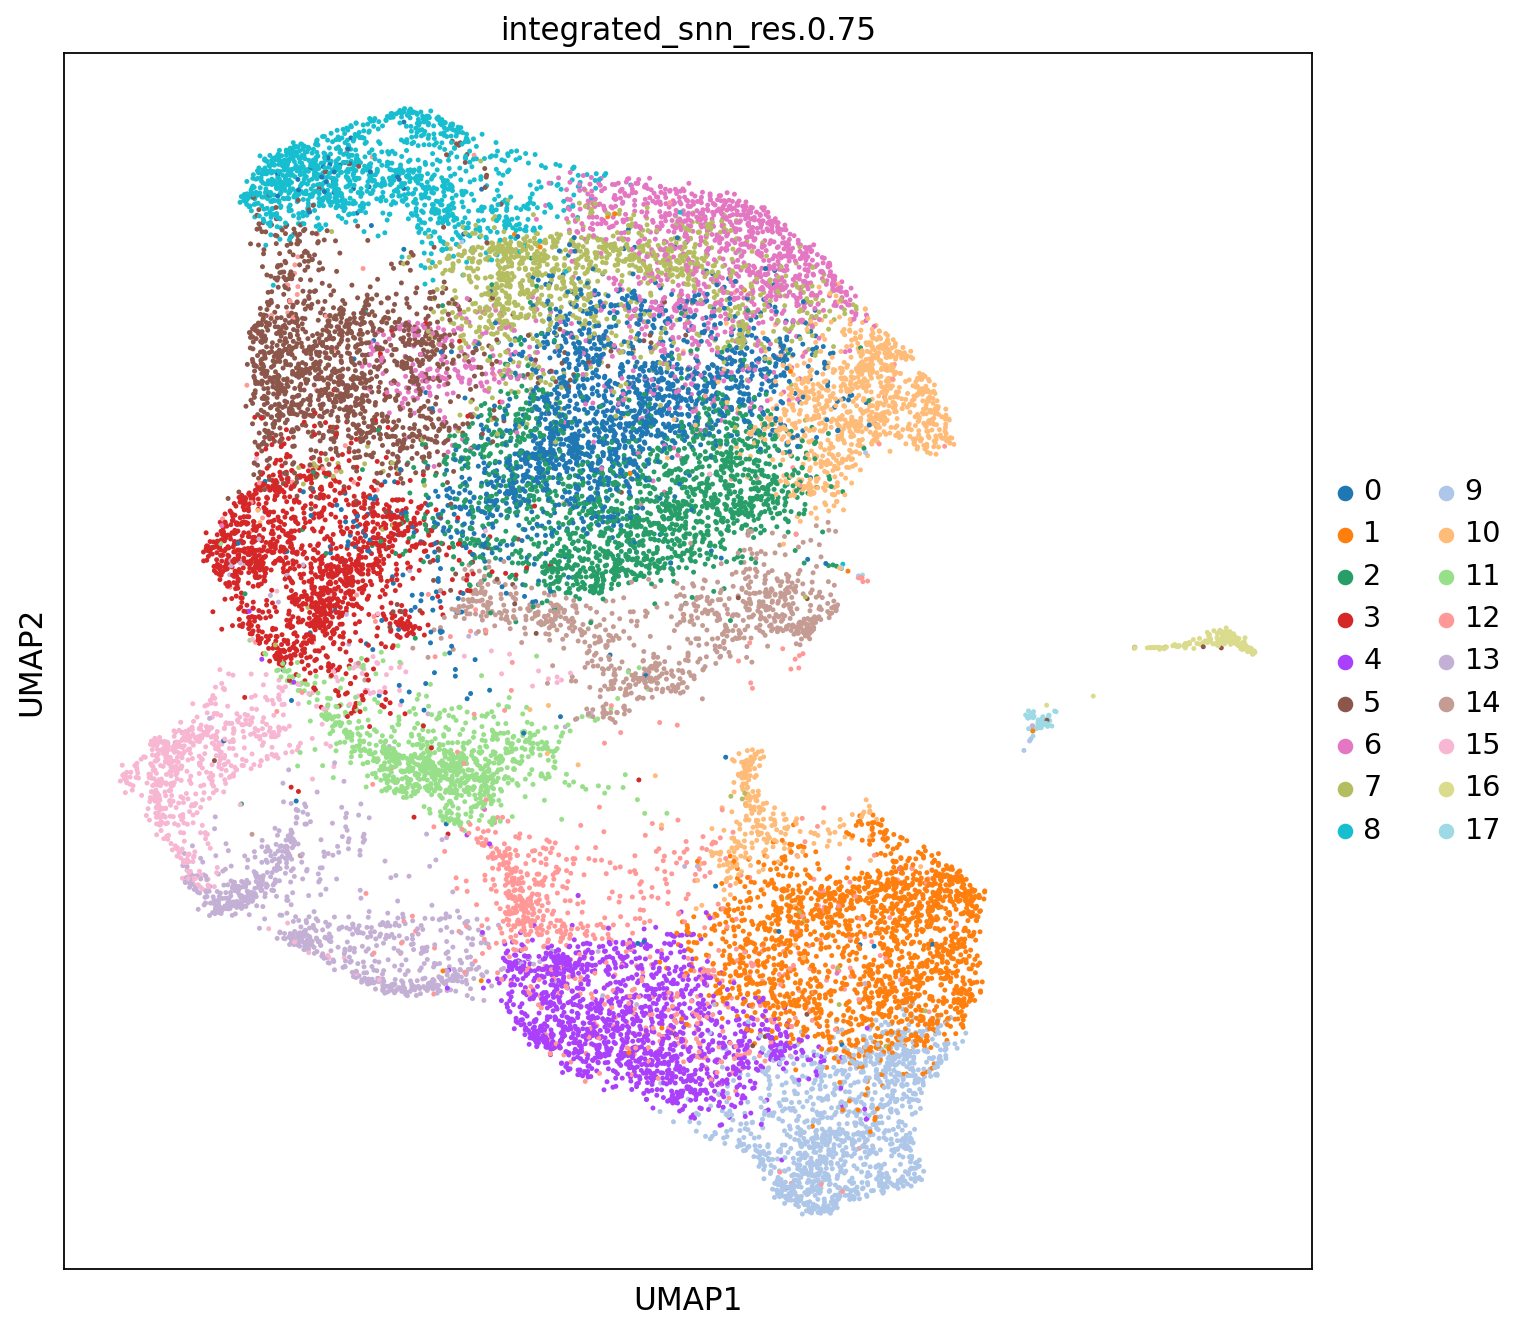

In [13]:
sc.set_figure_params(figsize=(10, 10))
sc.pl.umap(arabi_single_cell, color=['integrated_snn_res.0.75'], use_raw= False, s = 20) ### This is the correct one

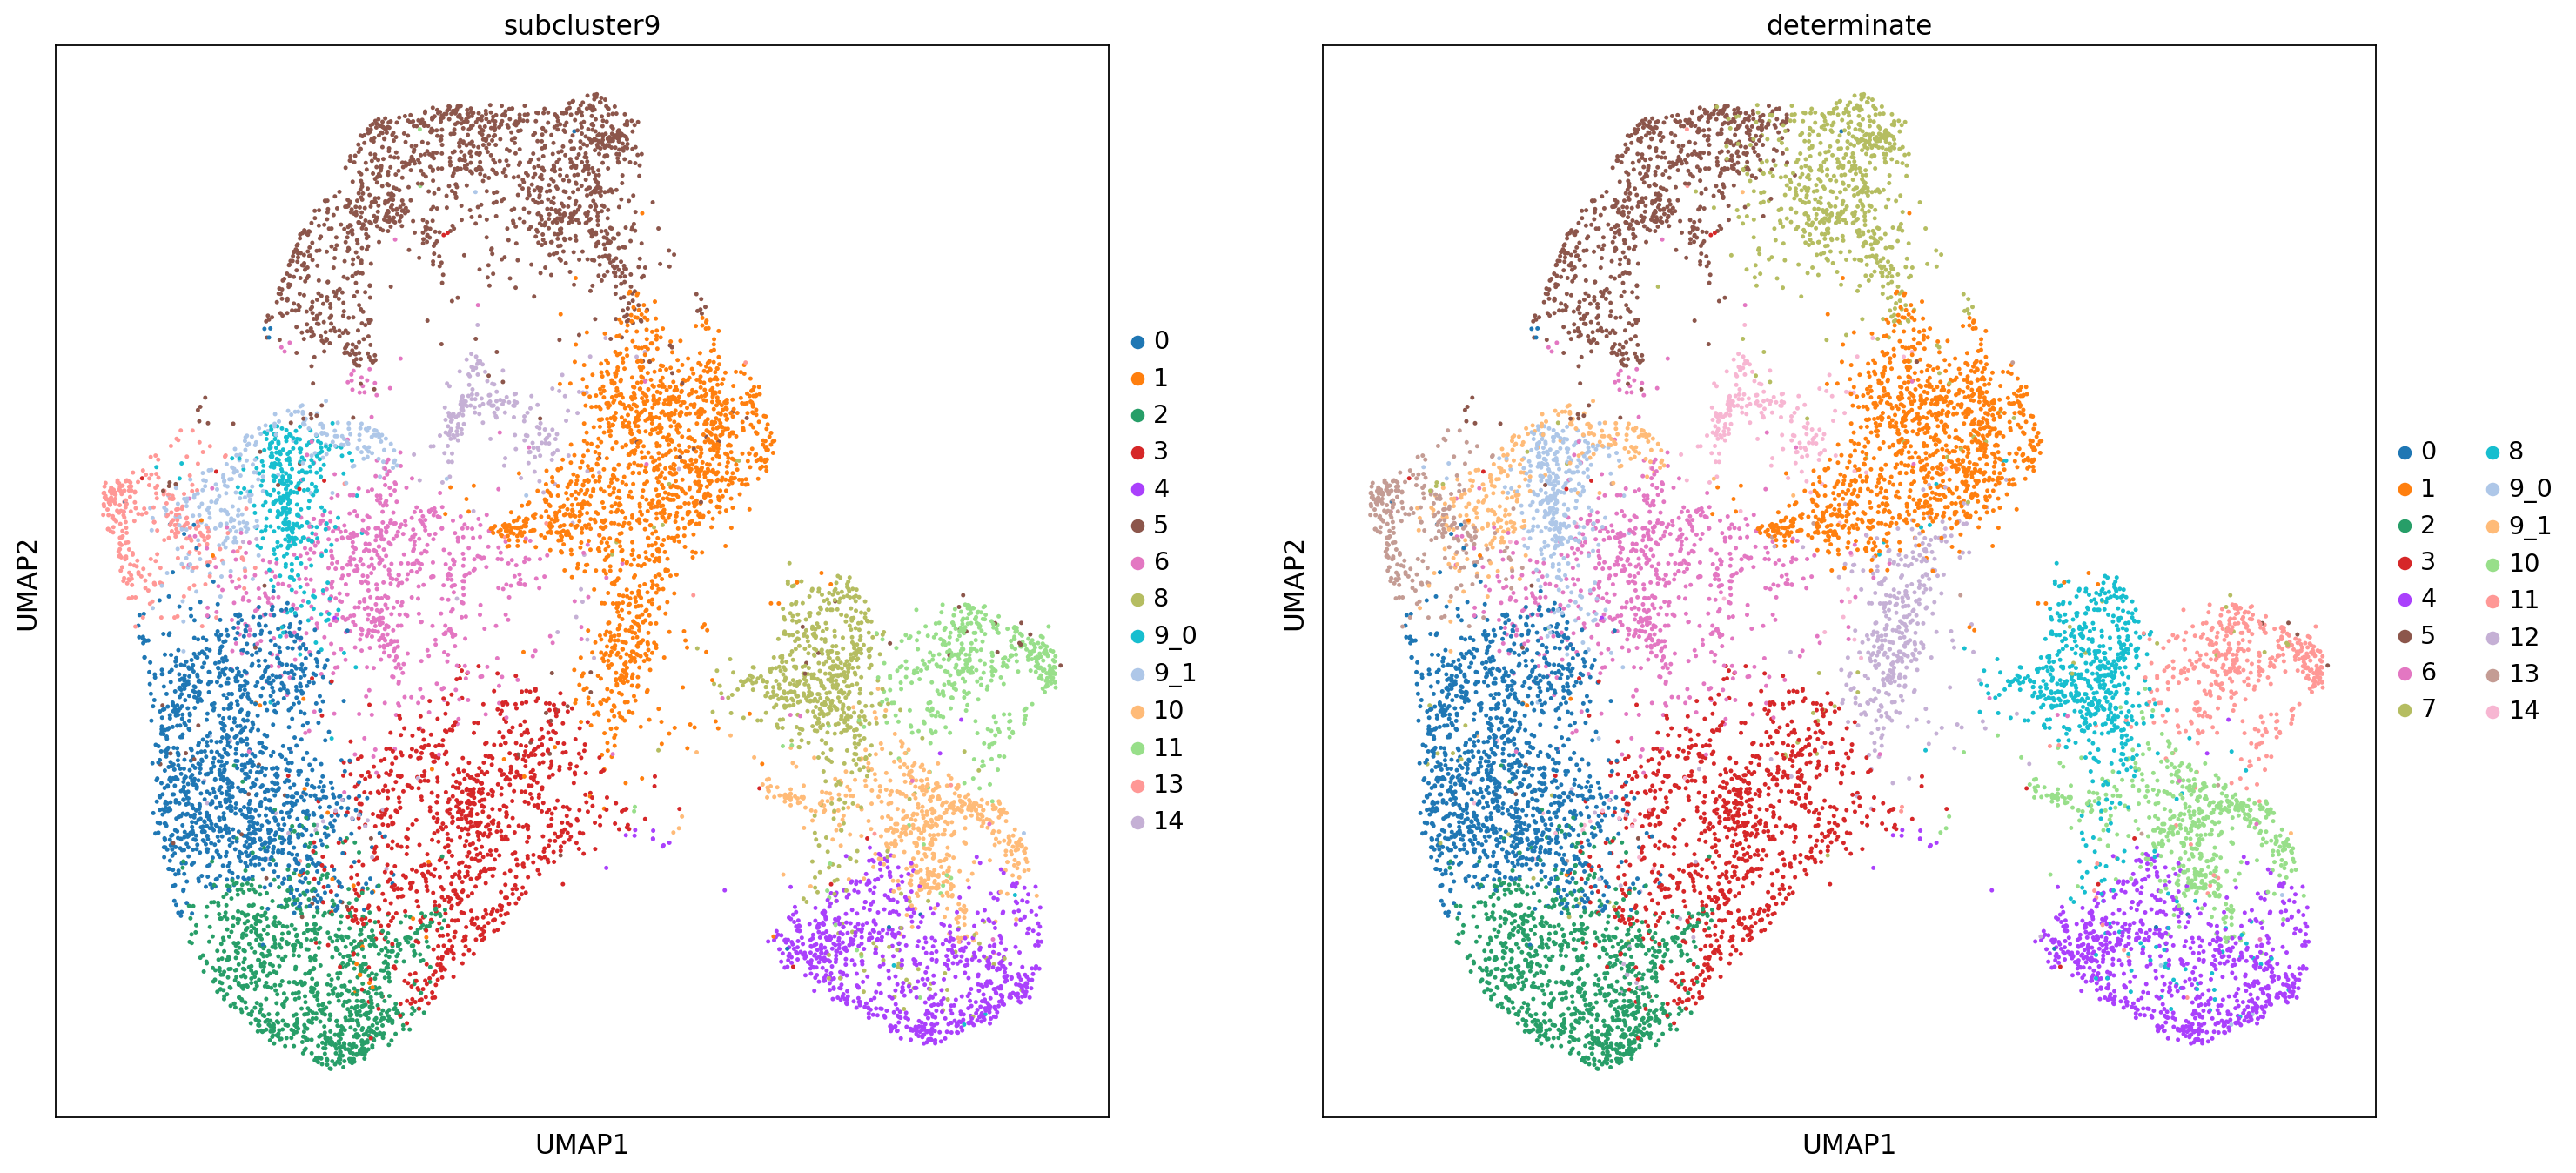

In [14]:
sc.pl.umap(maize_single_cell, color=['subcluster9','determinate'], use_raw= False, s = 20) ### Subcluster9 is correct

In [15]:
cell_type_mapper_for_maize = {'11':'Cell Cycle G2M Epi',
    '5':'Cell Cycle G2M Non-Epi',
    '8':'Cell Cycle S Epi',
    '1':'Cell Cycle S NonEpi',
    '0':'Cortex',
    '2':'Cortex',
    '14':'Vasculature',
    '3':'Central Zone',
    '6':'Central Zone',
    #'13':'Adaxial Meristem',
    '9_0':'Determinate Lateral Organ Non Epi',
    '4':'Determinate Lateral Organ Epi',
    #'10':'Meristem Epidermis'
    }
    

In [16]:
maize_single_cell.obs['Cell Type'] = maize_single_cell.obs['subcluster9'].map(cell_type_mapper_for_maize)

In [17]:
cell_mapper_for_arabi = {'13':'Cell Cycle G2M Epi',
    '15':'Cell Cycle G2M Non-Epi',
    '12':'Cell Cycle S Epi',
    '11':'Cell Cycle S NonEpi',
    '6':'Cortex',
    '7':'Cortex',
    '8':'Cortex',
    '2':'Vasculature',
    '14':'Vasculature',
    '16':'Vasculature',
    '17':'Vasculature',
    '0':'Central Zone',
    '10':'Central Zone',
    '5':'Determinate Lateral Organ Non Epi',
    '1':'Determinate Lateral Organ Epi',
    }

In [18]:
cell_type_number_mapper = {'Cell Cycle G2M Epi':0,
    'Cell Cycle G2M Non-Epi':1,
    'Cell Cycle S Epi':2,
    'Cell Cycle S NonEpi':3,
    'Cortex':4,
    'Vasculature':5,
    'Central Zone':6,
    'Determinate Lateral Organ Non Epi':7,
    'Determinate Lateral Organ Epi':8}

In [19]:
list_of_cell_types = ['Cell Cycle G2M Epi',
    'Cell Cycle G2M Non-Epi',
    'Cell Cycle S Epi',
    'Cell Cycle S NonEpi',
    'Cortex',
    'Vasculature',
    'Central Zone',
    'Determinate Lateral Organ Non Epi',
    'Determinate Lateral Organ Epi']
list_of_cell_types

['Cell Cycle G2M Epi',
 'Cell Cycle G2M Non-Epi',
 'Cell Cycle S Epi',
 'Cell Cycle S NonEpi',
 'Cortex',
 'Vasculature',
 'Central Zone',
 'Determinate Lateral Organ Non Epi',
 'Determinate Lateral Organ Epi']

In [20]:
arabi_single_cell.obs['Cell Type'] = arabi_single_cell.obs['integrated_snn_res.0.75'].map(cell_mapper_for_arabi)
arabi_single_cell.obs

orig.ident  nCount_RNA  nFeature_RNA RNA_snn_res.0.5  \
AAACCCAAGGGATGTC-1_1  xu41_l151     11263.0          3178               4   
AAACCCACAAATAGCA-1_1  xu41_l151      4717.0          2372               0   
AAACCCACAGAGAATT-1_1  xu41_l151      2507.0          1423               1   
AAACCCAGTCTCGGAC-1_1  xu41_l151      3596.0          1394               1   
AAACCCAGTGAAGCGT-1_1  xu41_l151      3468.0          1133               5   
...                         ...         ...           ...             ...   
TTTGTTGCAGAGTAAT-1_2  xu42_l151     23882.0          6459               2   
TTTGTTGCATGTCAGT-1_2  xu42_l151     21439.0          5364               8   
TTTGTTGTCGACACCG-1_2  xu42_l151      6479.0          2714               5   
TTTGTTGTCGCCTATC-1_2  xu42_l151      2002.0          1211               2   
TTTGTTGTCGGAGCAA-1_2  xu42_l151       340.0           239               7   

                      seurat_clusters source integrated_snn_res.0.75  \
AAACCCAAGGGATGTC-1_1                3   xu41                       0   
AAACCCACAAATAGCA-1_1                6   xu41                       5   
AAACCCACAGAGAATT-1_1                7   xu41                      13   
AAACCCAGTCTCGGAC-1_1                2   xu41                      12   
AAACCCAGTGAAGCGT-1_1                1   xu41                       9   
...                               ...    ...                     ...   
TTTGTTGCAGAGTAAT-1_2                2   xu42                      12   
TTTGTTGCATGTCAGT-1_2                2   xu42                       4   
TTTGTTGTCGACACCG-1_2                8   xu42                       8   
TTTGTTGTCGCCTATC-1_2                2   xu42                       4   
TTTGTTGTCGGAGCAA-1_2                7   xu42                      13   

                                              Cell Type  
AAACCCAAGGGATGTC-1_1                       Central Zone  
AAACCCACAAATAGCA-1_1  Determinate Lateral Organ Non Epi  
AAACCCACAGAGAATT-1_1                 Cell Cycle G2M Epi  
AAACCCAGTCTCGGAC-1_1                   Cell Cycle S Epi  
AAACCCAGTGAAGCGT-1_1                                NaN  
...                                                 ...  
TTTGTTGCAGAGTAAT-1_2                   Cell Cycle S Epi  
TTTGTTGCATGTCAGT-1_2                                NaN  
TTTGTTGTCGACACCG-1_2                             Cortex  
TTTGTTGTCGCCTATC-1_2                                NaN  
TTTGTTGTCGGAGCAA-1_2                 Cell Cycle G2M Epi  

[20224 rows x 8 columns]

In [21]:
labeled_arabi_single_cell = arabi_single_cell[~arabi_single_cell.obs['Cell Type'].isna(),:]
labeled_maize_single_cell = maize_single_cell[~maize_single_cell.obs['Cell Type'].isna(),:]


In [29]:
maize_clusters = list(set(maize_single_cell.obs['subcluster9']))
arabi_clusters =list(set(arabi_single_cell.obs['integrated_snn_res.0.75']))

In [30]:
all_maize_cluster_means = []

for cluster_id in maize_clusters:
    current_type_anndata = maize_single_cell[maize_single_cell.obs['subcluster9'] == cluster_id,:]
    all_gene_means = current_type_anndata.X.todense().mean(0).tolist()
    all_maize_cluster_means.extend(all_gene_means)

all_arabi_cluster_means = []

for cluster_id in arabi_clusters:
    current_type_anndata = arabi_single_cell[arabi_single_cell.obs['integrated_snn_res.0.75'] == cluster_id,:]
    all_gene_means = current_type_anndata.X.todense().mean(0).tolist()
    all_arabi_cluster_means.extend(all_gene_means)

psuedobulked_clusters_maize = pd.DataFrame(data = all_maize_cluster_means, index = maize_clusters, columns = maize_single_cell.var.index)
psuedobulked_clusters_arabi = pd.DataFrame(data = all_arabi_cluster_means, index = arabi_clusters, columns = labeled_arabi_single_cell.var.index)

In [31]:
psuedobulked_clusters_maize

_index  GRMZM2G059865  GRMZM2G093344  GRMZM2G306216  GRMZM2G104572  \
9_0          0.334105       0.015983       0.001387       0.000000   
11           0.761820       0.017763       0.002936       0.000467   
2            0.278655       0.017044       0.018947       0.001634   
8            0.400605       0.016451       0.000979       0.000000   
0            0.340170       0.014774       0.009520       0.002261   
10           0.354603       0.022161       0.000667       0.000784   
14           0.488801       0.014399       0.005732       0.000000   
13           0.408910       0.011385       0.001791       0.000000   
6            0.484065       0.016963       0.001836       0.001649   
5            0.758646       0.017422       0.003037       0.002901   
3            0.381978       0.012415       0.008816       0.000655   
1            0.415422       0.012632       0.002667       0.002274   
9_1          0.404129       0.020101       0.002165       0.000000   
4            0.276107       0.021442       0.002939       0.000336   

_index  GRMZM5G822187  GRMZM2G023794  GRMZM2G471814  GRMZM2G330436  \
9_0          0.001503       0.005458       0.002053       0.146920   
11           0.003089       0.007408       0.001531       0.129754   
2            0.000552       0.017466       0.010088       0.136872   
8            0.000211       0.002671       0.003430       0.103757   
0            0.000000       0.009252       0.002262       0.141077   
10           0.000926       0.002584       0.001417       0.145282   
14           0.000000       0.005489       0.003752       0.096509   
13           0.000000       0.008863       0.001988       0.149583   
6            0.000447       0.003219       0.000554       0.122555   
5            0.000696       0.007239       0.003163       0.126584   
3            0.001136       0.007278       0.005176       0.112829   
1            0.002081       0.002027       0.002511       0.109372   
9_1          0.003983       0.009823       0.001032       0.144996   
4            0.000000       0.007602       0.005716       0.147018   

_index  GRMZM2G032104  GRMZM2G333069  ...  GRMZM2G002630  GRMZM2G068275  \
9_0          0.129919       0.140426  ...       0.000000       0.000000   
11           0.154305       0.022747  ...       0.000000       0.000000   
2            0.194863       0.089850  ...       0.000000       0.000000   
8            0.141264       0.032781  ...       0.000000       0.000000   
0            0.227626       0.151903  ...       0.000000       0.000000   
10           0.186236       0.021367  ...       0.000000       0.000000   
14           0.232699       0.141443  ...       0.000000       0.000000   
13           0.118441       0.088441  ...       0.000000       0.001192   
6            0.272471       0.030825  ...       0.000000       0.000000   
5            0.191562       0.051681  ...       0.000000       0.000000   
3            0.220114       0.042279  ...       0.000996       0.000000   
1            0.175410       0.052291  ...       0.000197       0.000095   
9_1          0.133293       0.060159  ...       0.000000       0.002949   
4            0.168592       0.059960  ...       0.000549       0.000464   

_index  GRMZM2G307823  GRMZM5G875445  GRMZM2G337548  GRMZM2G343437  \
9_0          0.000000       0.000000       0.000749       0.002813   
11           0.000000       0.000000       0.000000       0.000000   
2            0.000000       0.000155       0.000000       0.000000   
8            0.000304       0.000715       0.000000       0.000470   
0            0.000318       0.000000       0.000000       0.000000   
10           0.000973       0.000000       0.000000       0.000000   
14           0.000000       0.000000       0.001324       0.000000   
13           0.001512       0.000000       0.000000       0.002302   
6            0.000000       0.000000       0.000000       0.000224   
5            0.000172       0.000000       0.000139       0.000000   
3 

In [33]:
#psuedobulked_clusters_maize.to_csv('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/output_csv_for_jack/psuedobulked_maize_clusters_subcluster9.csv')

In [34]:
psuedobulke#d_clusters_arabi.to_csv('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/output_csv_for_jack/psudeobulked_arabidopsis_Clusters_integrated_snn_res_.75.csv')

In [21]:
### first do pairwise coexpression scores
maize_gene_means = []
maize_gene_std = []


for cell_type in list_of_cell_types:
    current_type_anndata = labeled_maize_single_cell[labeled_maize_single_cell.obs['Cell Type'] == cell_type,:]
    all_gene_means = current_type_anndata.X.todense().mean(0).tolist()
    all_gene_std = current_type_anndata.X.todense().std(0).tolist()
    maize_gene_means.extend(all_gene_means)
    maize_gene_std.extend(all_gene_std)


arabi_gene_means = []
arabi_gene_std = []


for cell_type in list_of_cell_types:
    current_type_anndata = labeled_arabi_single_cell[labeled_arabi_single_cell.obs['Cell Type'] == cell_type,:]
    all_gene_means = current_type_anndata.X.todense().mean(0).tolist()
    all_gene_std = current_type_anndata.X.todense().std(0).tolist()
    arabi_gene_means.extend(all_gene_means)
    arabi_gene_std.extend(all_gene_std)



In [22]:
maize_psuedobulked_means = pd.DataFrame(data = maize_gene_means, index = list_of_cell_types, columns = labeled_maize_single_cell.var.index)
maize_psuedobulked_std = pd.DataFrame(data =maize_gene_std, index = list_of_cell_types, columns = labeled_maize_single_cell.var.index )
arabi_psuedobulked_means = pd.DataFrame(data = arabi_gene_means, index = list_of_cell_types, columns = labeled_arabi_single_cell.var.index)
arabi_psuedobulked_std = pd.DataFrame(data =arabi_gene_std, index = list_of_cell_types, columns = labeled_arabi_single_cell.var.index )

In [23]:

list_of_ADK_genes_in_maize = ['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767']
list_of_PFKB_genes_in_maize = ['GRMZM2G051842','GRMZM2G171400','GRMZM2G007630','GRMZM2G178346','GRMZM2G121128','GRMZM2G132607','GRMZM2G132623']
arabidopsis_adk_genes = ['AT3G09820','AT5G03300']
arabidopsis_PFKB_genes = ['AT1G19600','AT1G17160','AT4G27600','AT5G43910','AT4G28706']

In [24]:
all_genes_of_interest = list_of_ADK_genes_in_maize+ list_of_PFKB_genes_in_maize+ arabidopsis_adk_genes + arabidopsis_PFKB_genes
adk_genes = list_of_ADK_genes_in_maize+arabidopsis_adk_genes
pfkb_genes = list_of_PFKB_genes_in_maize+arabidopsis_PFKB_genes

In [25]:
all_means_concat = pd.concat([maize_psuedobulked_means,arabi_psuedobulked_means], axis = 1)
all_std_concat = pd.concat([maize_psuedobulked_std,arabi_psuedobulked_std],axis = 1)

In [26]:
arabi_psuedobulked_means

_index                             AT1G01010  AT1G01020  AT1G01030  AT1G01040  \
Cell Cycle G2M Epi                  0.008964   0.162535   0.001187   0.101883   
Cell Cycle G2M Non-Epi              0.014090   0.139214   0.005032   0.096381   
Cell Cycle S Epi                    0.019011   0.153677   0.004969   0.121690   
Cell Cycle S NonEpi                 0.027768   0.157709   0.004543   0.112462   
Cortex                              0.061513   0.079645   0.017681   0.075372   
Vasculature                         0.046170   0.079514   0.003161   0.106866   
Central Zone                        0.045777   0.077086   0.022350   0.064788   
Determinate Lateral Organ Non Epi   0.011122   0.108082   0.002371   0.130232   
Determinate Lateral Organ Epi       0.008059   0.056606   0.015062   0.048970   

_index                             AT1G01050  AT1G03997  AT1G01060  AT1G01070  \
Cell Cycle G2M Epi                  0.538110   0.000140   0.118593   0.000000   
Cell Cycle G2M Non-Epi              0.541438   0.000000   0.072279   0.000000   
Cell Cycle S Epi                    0.464897   0.000000   0.082225   0.000000   
Cell Cycle S NonEpi                 0.362052   0.000000   0.065201   0.000000   
Cortex                              0.367205   0.000000   0.050485   0.000195   
Vasculature                         0.401160   0.000000   0.039069   0.002805   
Central Zone                        0.288027   0.000438   0.023434   0.000455   
Determinate Lateral Organ Non Epi   0.539419   0.000229   0.103890   0.000000   
Determinate Lateral Organ Epi       0.228977   0.000069   0.020437   0.000000   

_index                             AT1G01080  AT1G01090  ...  AT5G04000  \
Cell Cycle G2M Epi                  0.045512   0.447015  ...   0.000000   
Cell Cycle G2M Non-Epi              0.034548   0.452725  ...   0.000762   
Cell Cycle S Epi                    0.033856   0.446059  ...   0.000000   
Cell Cycle S NonEpi                 0.028447   0.449687  ...   0.000000   
Cortex                              0.026700   0.316862  ...   0.000186   
Vasculature                         0.011776   0.301810  ...   0.000000   
Central Zone                        0.008075   0.275112  ...   0.000000   
Determinate Lateral Organ Non Epi   0.039610   0.376257  ...   0.001352   
Determinate Lateral Organ Epi       0.004153   0.273047  ...   0.000000   

_index                             AT5G07780  AT5G25160  AT5G26930  AT5G30360  \
Cell Cycle G2M Epi                  0.000172   0.000000   0.000219   0.000000   
Cell Cycle G2M Non-Epi              0.000000   0.000000   0.000000   0.000000   
Cell Cycle S Epi                    0.000000   0.000194   0.000000   0.000933   
Cell Cycle S NonEpi                 0.000000   0.001129   0.000000   0.000000   
Cortex                              0.000633   0.000000   0.000000   0.000000   
Vasculature                         0.000000   0.000398   0.000292   0.000000   
Central Zone                        0.000000   0.000000   0.000538   0.000000   
Determinate Lateral Organ Non Epi   0.000000   0.000000   0.000000   0.000000   
Determinate Lateral Organ Epi       0.001615   0.000000   0.000452   0.000068   

_index                             AT5G43640  AT5G08815  AT5G60490  AT5G61495  \
Cell Cycle G2M Epi                  0.000000   0.000000   0.000172    0.00000   
Cell Cycle G2M Non-Epi              0.000000   0.000000   0.000000    0.00036   
Cell Cycle S Epi                    0.000185   0.000000   0.000000    0.00000   
Cell Cycle S NonEpi                 0.000000   0.000000   0.000000    0.00000   
Cortex                              0.000000   0.000805   0.000000    0.00000   
Vasculature                         0.000000   0.000307   0.001256    0.00000   
Central Zone                        0.000165   0.000000   0.000748    0.00000   
Determinate Lateral Organ Non Epi   0.000331   0.000000   0.000000    0.00000   
Determinate Lateral Organ Epi       0.000088   0.000149   0.000000    0.00000   

_inde

In [27]:
arabi_self_corr = arabi_psuedobulked_means.corr(method ='pearson')

In [28]:
maize_self_corr = maize_psuedobulked_means.corr(method ='pearson')

In [29]:
arabi_self_corr.filter(arabidopsis_adk_genes).filter(arabidopsis_adk_genes,axis = 0)

_index     AT3G09820  AT5G03300
_index                         
AT3G09820   1.000000   0.968033
AT5G03300   0.968033   1.000000

In [30]:
arabi_self_corr.filter(arabidopsis_PFKB_genes).filter(arabidopsis_PFKB_genes,axis = 0)

_index     AT1G19600  AT1G17160  AT4G27600  AT5G43910  AT4G28706
_index                                                          
AT1G19600   1.000000   0.145131   0.777176   0.783006   0.528853
AT1G17160   0.145131   1.000000   0.121623   0.159354   0.735870
AT4G27600   0.777176   0.121623   1.000000   0.577021   0.296884
AT5G43910   0.783006   0.159354   0.577021   1.000000   0.560309
AT4G28706   0.528853   0.735870   0.296884   0.560309   1.000000

In [31]:
maize_self_corr.filter(list_of_ADK_genes_in_maize).filter(list_of_ADK_genes_in_maize,axis = 0)

_index         GRMZM2G540538  GRMZM2G135132  GRMZM2G003775  GRMZM2G089767
_index                                                                   
GRMZM2G540538       1.000000       0.498273       0.485220       0.285967
GRMZM2G135132       0.498273       1.000000      -0.130411      -0.177653
GRMZM2G003775       0.485220      -0.130411       1.000000      -0.275483
GRMZM2G089767       0.285967      -0.177653      -0.275483       1.000000

In [32]:
maize_self_corr.filter(list_of_PFKB_genes_in_maize).filter(list_of_PFKB_genes_in_maize,axis = 0)

_index         GRMZM2G051842  GRMZM2G171400  GRMZM2G007630  GRMZM2G178346  \
_index                                                                      
GRMZM2G051842       1.000000       0.586316       0.613115       0.702213   
GRMZM2G171400       0.586316       1.000000       0.576443       0.834820   
GRMZM2G007630       0.613115       0.576443       1.000000       0.895474   
GRMZM2G178346       0.702213       0.834820       0.895474       1.000000   
GRMZM2G121128       0.063172       0.403524       0.600217       0.527486   
GRMZM2G132607       0.840216       0.523570       0.427046       0.590473   
GRMZM2G132623      -0.591241      -0.676328      -0.414417      -0.619532   

_index         GRMZM2G121128  GRMZM2G132607  GRMZM2G132623  
_index                                                      
GRMZM2G051842       0.063172       0.840216      -0.591241  
GRMZM2G171400       0.403524       0.523570      -0.676328  
GRMZM2G007630       0.600217       0.427046      -0.414417  
GRMZM2G178346       0.527486       0.590473      -0.619532  
GRMZM2G121128       1.000000       0.195549       0.260860  
GRMZM2G132607       0.195549       1.000000      -0.319550  
GRMZM2G132623       0.260860      -0.319550       1.000000

In [33]:
all_means_concat[all_genes_of_interest]

_index                             GRMZM2G540538  GRMZM2G135132  \
Cell Cycle G2M Epi                      1.139954       0.022732   
Cell Cycle G2M Non-Epi                  1.250194       0.137064   
Cell Cycle S Epi                        0.928519       0.014196   
Cell Cycle S NonEpi                     1.050431       0.086007   
Cortex                                  1.359409       0.065336   
Vasculature                             1.102271       0.035002   
Central Zone                            1.253818       0.043719   
Determinate Lateral Organ Non Epi       1.204646       0.156938   
Determinate Lateral Organ Epi           0.995798       0.011677   

_index                             GRMZM2G003775  GRMZM2G089767  \
Cell Cycle G2M Epi                      0.000969       0.006773   
Cell Cycle G2M Non-Epi                  0.000476       0.011901   
Cell Cycle S Epi                        0.000237       0.010418   
Cell Cycle S NonEpi                     0.000516       0.011306   
Cortex                                  0.000729       0.026911   
Vasculature                             0.000000       0.026870   
Central Zone                            0.000897       0.025120   
Determinate Lateral Organ Non Epi       0.000000       0.017859   
Determinate Lateral Organ Epi           0.000000       0.027109   

_index                             GRMZM2G051842  GRMZM2G171400  \
Cell Cycle G2M Epi                      0.235766       0.101660   
Cell Cycle G2M Non-Epi                  0.299368       0.252975   
Cell Cycle S Epi                        0.267941       0.107028   
Cell Cycle S NonEpi                     0.351984       0.187933   
Cortex                                  0.772490       0.259219   
Vasculature                             0.395678       0.165831   
Central Zone                            0.524113       0.236529   
Determinate Lateral Organ Non Epi       0.311496       0.191347   
Determinate Lateral Organ Epi           0.478835       0.137124   

_index                             GRMZM2G007630  GRMZM2G178346  \
Cell Cycle G2M Epi                      0.001730       0.132322   
Cell Cycle G2M Non-Epi                  0.003893       0.227622   
Cell Cycle S Epi                        0.001859       0.113467   
Cell Cycle S NonEpi                     0.001563       0.142539   
Cortex                                  0.005181       0.285976   
Vasculature                             0.000000       0.114920   
Central Zone                            0.002394       0.183642   
Determinate Lateral Organ Non Epi       0.001518       0.162572   
Determinate Lateral Organ Epi           0.002963       0.150156   

_index                             GRMZM2G121128  GRMZM2G132607  \
Cell Cycle G2M Epi                      0.071889       0.013146   
Cell Cycle G2M Non-Epi                  0.086824       0.019981   
Cell Cycle S Epi                        0.069189       0.020289   
Cell Cycle S NonEpi                     0.069558       0.017222   
Cortex                                  0.077108       0.050797   
Vasculature                             0.051833       0.031225   
Central Zone                            0.078733       0.033143   
Determinate Lateral Organ Non Epi       0.088355       0.037717   
Determinate Lateral Organ Epi           0.080236       0.033326   

_index                             GRMZM2G132623  AT3G09820  AT5G03300  \
Cell Cycle G2M Epi                      2.923483   0.809632   0.521857   
Cell Cycle G2M Non-Epi                  2.644871   0.789953   0.429695   
Cell Cycle S Epi                        2.829595   0.689029   0.391816   
Cell Cycle S NonEpi                     2.654266   0.745378   0.464298   
Cortex                                  2.394889   0.436322   0.186920   
Vasculature                             2.638147   0.452002   0.152774   
Central Zone                            2.712707   0.332674   0.138548   
Determinate Lateral Organ Non Epi       2.994546   0.

In [34]:
full_correlations = all_means_concat.corr(method ='pearson')

In [35]:
adk_correlations = full_correlations.filter(list_of_ADK_genes_in_maize).filter(arabidopsis_adk_genes,axis = 0)
adk_correlations

_index     GRMZM2G540538  GRMZM2G135132  GRMZM2G003775  GRMZM2G089767
_index                                                               
AT3G09820      -0.134090       0.401644       0.156381      -0.943905
AT5G03300      -0.181295       0.238952       0.324527      -0.978253

In [36]:
pfkb_correlations = full_correlations.filter(list_of_PFKB_genes_in_maize).filter(arabidopsis_PFKB_genes,axis = 0)
pfkb_correlations

_index     GRMZM2G051842  GRMZM2G171400  GRMZM2G007630  GRMZM2G178346  \
_index                                                                  
AT1G19600      -0.043376      -0.079456      -0.152125      -0.070448   
AT1G17160      -0.724747      -0.392167      -0.071889      -0.198120   
AT4G27600       0.248684       0.328437       0.365983       0.400636   
AT5G43910      -0.112101       0.251454      -0.267221       0.049343   
AT4G28706      -0.539612      -0.241215      -0.160401      -0.150416   

_index     GRMZM2G121128  GRMZM2G132607  GRMZM2G132623  
_index                                                  
AT1G19600       0.099297       0.352986       0.125533  
AT1G17160       0.349167      -0.614170       0.468463  
AT4G27600       0.606874       0.497222       0.012850  
AT5G43910       0.058310       0.267823      -0.114269  
AT4G28706      -0.013368      -0.400202       0.015962

In [37]:
maize_vs_arabi_correlations = full_correlations.filter(labeled_arabi_single_cell.var.index).drop(labeled_arabi_single_cell.var.index)

In [38]:
maize_vs_arabi_correlations

_index         AT1G01010  AT1G01020  AT1G01030  AT1G01040  AT1G01050  \
_index                                                                 
GRMZM2G059865  -0.301722   0.583523  -0.472711   0.215323   0.629422   
GRMZM2G093344  -0.577326  -0.232743   0.086128  -0.456240  -0.075486   
GRMZM2G306216   0.853666  -0.498356   0.589101  -0.456086  -0.332683   
GRMZM2G104572   0.223123   0.217024   0.190300  -0.181999   0.012341   
GRMZM5G822187  -0.383485   0.656651  -0.443173   0.362043   0.451314   
...                  ...        ...        ...        ...        ...   
GRMZM2G343437  -0.320711   0.062238  -0.333136   0.571137   0.409523   
GRMZM2G177792  -0.378902   0.422522  -0.219669   0.228610   0.114935   
GRMZM2G061499   0.139387   0.517063  -0.133142   0.308932  -0.054146   
GRMZM2G071924  -0.461307   0.147917  -0.068348  -0.312436  -0.049497   
GRMZM2G450231   0.150806   0.232093   0.052506   0.090278   0.290201   

_index         AT1G03997  AT1G01060  AT1G01070  AT1G01080  AT1G01090  ...  \
_index                                                                ...   
GRMZM2G059865  -0.081607   0.477478   0.017558   0.488786   0.575061  ...   
GRMZM2G093344  -0.101182  -0.023286  -0.329458  -0.085055  -0.145021  ...   
GRMZM2G306216  -0.069728  -0.407004   0.225081  -0.263611  -0.495508  ...   
GRMZM2G104572  -0.235587  -0.107688  -0.315663   0.118617   0.291858  ...   
GRMZM5G822187   0.232461   0.699997  -0.368572   0.640514   0.568235  ...   
...                  ...        ...        ...        ...        ...  ...   
GRMZM2G343437   0.290401   0.469319  -0.205603   0.388885   0.117520  ...   
GRMZM2G177792  -0.245970   0.275217  -0.272026   0.227417   0.378755  ...   
GRMZM2G061499  -0.493860   0.078270  -0.289923   0.222288   0.514714  ...   
GRMZM2G071924   0.173804   0.228259  -0.251431   0.099304   0.056802  ...   
GRMZM2G450231  -0.481436   0.107976  -0.261786   0.305327   0.340739  ...   

_index         AT5G04000  AT5G07780  AT5G25160  AT5G26930  AT5G30360  \
_index                                                                 
GRMZM2G059865   0.030734  -0.441791  -0.105039  -0.104837  -0.161634   
GRMZM2G093344   0.046132   0.755416  -0.625732   0.258717   0.087378   
GRMZM2G306216  -0.221144   0.199511  -0.171500   0.038207  -0.340459   
GRMZM2G104572   0.062408  -0.112844   0.248336  -0.347871  -0.356935   
GRMZM5G822187   0.095888  -0.353398   0.228250  -0.170273  -0.290695   
...                  ...        ...        ...        ...        ...   
GRMZM2G343437   0.806979  -0.250448  -0.081476  -0.358657   0.010577   
GRMZM2G177792  -0.346290   0.046599  -0.038250  -0.137108   0.924397   
GRMZM2G061499  -0.232715  -0.212322   0.776219  -0.590562   0.305921   
GRMZM2G071924  -0.360923   0.391774  -0.188910   0.430777  -0.198965   
GRMZM2G450231   0.083604  -0.092803  -0.242880  -0.575705   0.530855   

_index         AT5G43640  AT5G08815  AT5G60490  AT5G61495  AT5G09665  
_index                                                                
GRMZM2G059865  -0.452401  -0.362323   0.082842   0.614612  -0.239291  
GRMZM2G093344   0.040063  -0.034510  -0.378514   0.174615  -0.233169  
GRMZM2G306216  -0.405226   0.919469   0.187260  -0.127385   0.865870  
GRMZM2G104572  -0.532648   0.158899  -0.321284   0.637382   0.077486  
GRMZM5G822187  -0.063289  -0.441764  -0.241993  -0.093433  -0.430117  
...                  ...        ...        ...        ...        ...  
GRMZM2G343437   0.821322  -0.263010  -0.249959  -0.169609  -0.251982  
GRMZM2G177792   0.197044  -0.276712  -0.297869  -0.217538  -0.323188  
GRMZM2G061499  -0.251633   0.027466  -0.410100  -0.029069  -0.008871  
GRMZM2G071924  -0.245320  -0.237216  -0.121160  -0.226730  -0.336845  
GRMZM2G450231  -0.125505   0.319180  -0.399783   0.488175   0.247261  

[27146 rows x 22133 columns]

In [39]:
# each_maize_gene_is_x_percentile_with_col_gene = maize_vs_arabi_correlations.rank(pct = True)
# each_arabi_gene_is_x_percentile_with_row_gene = maize_vs_arabi_correlations.rank(pct = True, axis = 1)

In [40]:
# each_arabi_gene_is_x_percentile_with_row_gene.to_pickle('/data/passala/Generated_Tables/Temp_junk/each_arabi_gene_is_x_with_row.p')
# each_maize_gene_is_x_percentile_with_col_gene.to_pickle('/data/passala/Generated_Tables/Temp_junk/each_maize_gene_is_x_with_col.p')


In [41]:
each_maize_gene_is_x_percentile_with_col_gene = pd.read_pickle('/data/passala/Generated_Tables/Temp_junk/each_maize_gene_is_x_with_col.p')
each_arabi_gene_is_x_percentile_with_row_gene = pd.read_pickle('/data/passala/Generated_Tables/Temp_junk/each_arabi_gene_is_x_with_row.p')

In [42]:
each_maize_gene_is_x_percentile_with_col_gene

_index         AT1G01010  AT1G01020  AT1G01030  AT1G01040  AT1G01050  \
_index                                                                 
GRMZM2G059865   0.382980   0.952883   0.072315   0.831055   0.964008   
GRMZM2G093344   0.175355   0.475815   0.496077   0.198969   0.469663   
GRMZM2G306216   0.971523   0.206926   0.865316   0.199190   0.219193   
GRMZM2G104572   0.673236   0.786333   0.574876   0.479610   0.550709   
GRMZM5G822187   0.324516   0.973034   0.086498   0.916522   0.877104   
...                  ...        ...        ...        ...        ...   
GRMZM2G343437   0.370529   0.699282   0.155793   0.984159   0.852570   
GRMZM2G177792   0.328348   0.887309   0.242512   0.840486   0.639160   
GRMZM2G061499   0.633524   0.927353   0.317296   0.889814   0.489077   
GRMZM2G071924   0.263658   0.750857   0.371118   0.344446   0.493645   
GRMZM2G450231   0.639307   0.794290   0.469700   0.732621   0.774986   

_index         AT1G03997  AT1G01060  AT1G01070  AT1G01080  AT1G01090  ...  \
_index                                                                ...   
GRMZM2G059865   0.219819   0.882851   0.658832   0.917333   0.955535  ...   
GRMZM2G093344   0.196574   0.514202   0.249880   0.465242   0.527022  ...   
GRMZM2G306216   0.233561   0.189759   0.796316   0.290919   0.185559  ...   
GRMZM2G104572   0.082041   0.447817   0.269295   0.654080   0.823282  ...   
GRMZM5G822187   0.684472   0.983201   0.199668   0.982649   0.953104  ...   
...                  ...        ...        ...        ...        ...  ...   
GRMZM2G343437   0.763934   0.877989   0.427003   0.860379   0.721275  ...   
GRMZM2G177792   0.075336   0.744446   0.332363   0.746878   0.868116  ...   
GRMZM2G061499   0.005747   0.593001   0.306060   0.742126   0.931037  ...   
GRMZM2G071924   0.594695   0.709891   0.361945   0.637650   0.679720  ...   
GRMZM2G450231   0.006926   0.615951   0.346657   0.806742   0.849365  ...   

_index         AT5G04000  AT5G07780  AT5G25160  AT5G26930  AT5G30360  \
_index                                                                 
GRMZM2G059865   0.432897   0.070216   0.682078   0.237097   0.534389   
GRMZM2G093344   0.446970   0.939694   0.041223   0.718843   0.810278   
GRMZM2G306216   0.196206   0.549530   0.605268   0.418935   0.229029   
GRMZM2G104572   0.461153   0.301676   0.925843   0.051206   0.204826   
GRMZM5G822187   0.494382   0.113944   0.917591   0.168908   0.312249   
...                  ...        ...        ...        ...        ...   
GRMZM2G343437   0.982391   0.187585   0.705839   0.046196   0.744925   
GRMZM2G177792   0.092835   0.429029   0.744410   0.201695   0.998711   
GRMZM2G061499   0.185743   0.219525   0.996500   0.004679   0.915122   
GRMZM2G071924   0.082409   0.692061   0.582943   0.888893   0.473826   
GRMZM2G450231   0.481894   0.317222   0.510960   0.005379   0.969129   

_index         AT5G43640  AT5G08815  AT5G60490  AT5G61495  AT5G09665  
_index                                                                
GRMZM2G059865   0.060932   0.179517   0.670179   0.956419   0.367434  
GRMZM2G093344   0.494640   0.482741   0.174434   0.698582   0.373734  
GRMZM2G306216   0.094124   0.996648   0.744520   0.354393   0.989869  
GRMZM2G104572   0.027150   0.616836   0.244097   0.964119   0.601363  
GRMZM5G822187   0.397716   0.121459   0.350599   0.406778   0.166182  
...                  ...        ...        ...        ...        ...  
GRMZM2G343437   0.994216   0.276294   0.339878   0.290956   0.354946  
GRMZM2G177792   0.635808   0.261669   0.277841   0.214183   0.274673  
GRMZM2G061499   0.228919   0.527979   0.139694   0.493019   0.548020  
GRMZM2G071924   0.234997   0.301492   0.490698   0.200258   0.259164  
GRMZM2G450231   0.342973   0.718659   0.149825   0.902266   0.697366  

[27146 rows x 22133 columns]

In [43]:
arabi_pfkb_percentile = each_maize_gene_is_x_percentile_with_col_gene.filter(arabidopsis_PFKB_genes).filter(list_of_PFKB_genes_in_maize,axis = 0)
arabi_pfkb_percentile

_index         AT1G19600  AT1G17160  AT4G27600  AT5G43910  AT4G28706
_index                                                              
GRMZM2G051842   0.514901   0.034666   0.694566   0.411199   0.100460
GRMZM2G171400   0.466753   0.236544   0.769902   0.815730   0.379702
GRMZM2G007630   0.373549   0.449291   0.803979   0.238829   0.473789
GRMZM2G178346   0.479278   0.365776   0.831424   0.609873   0.485504
GRMZM2G121128   0.672205   0.739510   0.943452   0.620962   0.634408
GRMZM2G132607   0.876257   0.086388   0.891177   0.826856   0.215251
GRMZM2G132623   0.698324   0.818051   0.454485   0.409062   0.663953

In [44]:
arabi_adk_percentile = each_maize_gene_is_x_percentile_with_col_gene.filter(arabidopsis_adk_genes).filter(list_of_ADK_genes_in_maize,axis = 0)
arabi_adk_percentile

_index         AT3G09820  AT5G03300
_index                             
GRMZM2G540538   0.502376   0.483809
GRMZM2G135132   0.862000   0.776055
GRMZM2G003775   0.717664   0.822693
GRMZM2G089767   0.000479   0.000074

In [45]:
each_arabi_gene_is_x_percentile_with_row_gene

_index         AT1G01010  AT1G01020  AT1G01030  AT1G01040  AT1G01050  \
_index                                                                 
GRMZM2G059865   0.203994   0.676953   0.098902   0.468983   0.719243   
GRMZM2G093344   0.017485   0.233859   0.713279   0.051010   0.482628   
GRMZM2G306216   0.989292   0.226901   0.947364   0.312565   0.482311   
GRMZM2G104572   0.693489   0.686396   0.655763   0.297745   0.472146   
GRMZM5G822187   0.129806   0.916911   0.093300   0.586138   0.666606   
...                  ...        ...        ...        ...        ...   
GRMZM2G343437   0.091312   0.602087   0.083224   0.897980   0.831564   
GRMZM2G177792   0.018208   0.767316   0.097637   0.485384   0.359870   
GRMZM2G061499   0.545611   0.922695   0.254462   0.735237   0.338092   
GRMZM2G071924   0.051688   0.646546   0.402883   0.162472   0.421542   
GRMZM2G450231   0.420413   0.579542   0.294086   0.335427   0.700899   

_index         AT1G03997  AT1G01060  AT1G01070  AT1G01080  AT1G01090  ...  \
_index                                                                ...   
GRMZM2G059865   0.316676   0.600642   0.368003   0.607825   0.668911  ...   
GRMZM2G093344   0.437220   0.568653   0.126508   0.466724   0.362264  ...   
GRMZM2G306216   0.685086   0.392626   0.843943   0.547553   0.233226  ...   
GRMZM2G104572   0.251163   0.361045   0.187593   0.577870   0.774590  ...   
GRMZM5G822187   0.493968   0.954412   0.140017   0.897754   0.799892  ...   
...                  ...        ...        ...        ...        ...  ...   
GRMZM2G343437   0.772105   0.856594   0.237564   0.823296   0.654724  ...   
GRMZM2G177792   0.076899   0.548954   0.060905   0.483893   0.710387  ...   
GRMZM2G061499   0.010030   0.480820   0.095288   0.637961   0.921565  ...   
GRMZM2G071924   0.679935   0.751141   0.223512   0.585054   0.537478  ...   
GRMZM2G450231   0.005377   0.358469   0.056748   0.729589   0.789545  ...   

_index         AT5G04000  AT5G07780  AT5G25160  AT5G26930  AT5G30360  \
_index                                                                 
GRMZM2G059865   0.376406   0.116613   0.304794   0.304884   0.277549   
GRMZM2G093344   0.666968   0.987259   0.010256   0.849636   0.714725   
GRMZM2G306216   0.582027   0.834817   0.623097   0.743008   0.472643   
GRMZM2G104572   0.521981   0.356436   0.722677   0.156057   0.147924   
GRMZM5G822187   0.417838   0.153255   0.491212   0.277414   0.200515   
...                  ...        ...        ...        ...        ...   
GRMZM2G343437   0.971265   0.166990   0.429630   0.066281   0.549180   
GRMZM2G177792   0.027109   0.300999   0.235350   0.160484   0.994488   
GRMZM2G061499   0.153707   0.174762   0.984458   0.002711   0.731713   
GRMZM2G071924   0.119279   0.899652   0.290155   0.918673   0.281074   
GRMZM2G450231   0.326797   0.169521   0.070122   0.001988   0.962590   

_index         AT5G43640  AT5G08815  AT5G60490  AT5G61495  AT5G09665  
_index                                                                
GRMZM2G059865   0.111056   0.167216   0.409027   0.703813   0.238196  
GRMZM2G093344   0.659648   0.550445   0.092532   0.793024   0.233226  
GRMZM2G306216   0.395247   0.997741   0.830253   0.652216   0.991099  
GRMZM2G104572   0.036552   0.622103   0.183030   0.988885   0.536529  
GRMZM5G822187   0.336376   0.094248   0.234988   0.319161   0.100845  
...                  ...        ...        ...        ...        ...  
GRMZM2G343437   0.975060   0.147698   0.167533   0.301179   0.164415  
GRMZM2G177792   0.448877   0.058600   0.048073   0.099941   0.036190  
GRMZM2G061499   0.134641   0.425202   0.027832   0.365743   0.386708  
GRMZM2G071924   0.229928   0.238422   0.351240   0.253332   0.140424  
GRMZM2G450231   0.145529   0.754755   0.014142   0.941806   0.612208  

[27146 rows x 22133 columns]

In [46]:
maize_pfkb_percentile = each_arabi_gene_is_x_percentile_with_row_gene.filter(arabidopsis_PFKB_genes).filter(list_of_PFKB_genes_in_maize,axis = 0)
maize_pfkb_percentile

_index         AT1G19600  AT1G17160  AT4G27600  AT5G43910  AT4G28706
_index                                                              
GRMZM2G051842   0.701848   0.141102   0.822844   0.666290   0.395654
GRMZM2G171400   0.604256   0.163873   0.908237   0.868432   0.372385
GRMZM2G007630   0.341888   0.502372   0.909502   0.180997   0.326526
GRMZM2G178346   0.614377   0.416844   0.924186   0.734107   0.502011
GRMZM2G121128   0.557855   0.907152   0.995708   0.477793   0.350969
GRMZM2G132607   0.826639   0.350111   0.878236   0.796277   0.494059
GRMZM2G132623   0.591696   0.944020   0.383500   0.234266   0.388741

In [47]:
maize_adk_percentile = each_arabi_gene_is_x_percentile_with_row_gene.filter(arabidopsis_adk_genes).filter(list_of_ADK_genes_in_maize,axis = 0)
maize_adk_percentile

_index         AT3G09820  AT5G03300
_index                             
GRMZM2G540538   0.467673   0.391542
GRMZM2G135132   0.836714   0.670808
GRMZM2G003775   0.533502   0.790223
GRMZM2G089767   0.078390   0.007590

In [48]:
averages = (maize_pfkb_percentile.stack()+arabi_pfkb_percentile.stack())/2
averages = averages.unstack()
averages

_index         AT1G19600  AT1G17160  AT4G27600  AT5G43910  AT4G28706
_index                                                              
GRMZM2G051842   0.608375   0.087884   0.758705   0.538745   0.248057
GRMZM2G171400   0.535504   0.200209   0.839069   0.842081   0.376043
GRMZM2G007630   0.357719   0.475831   0.856740   0.209913   0.400157
GRMZM2G178346   0.546827   0.391310   0.877805   0.671990   0.493757
GRMZM2G121128   0.615030   0.823331   0.969580   0.549377   0.492688
GRMZM2G132607   0.851448   0.218249   0.884707   0.811566   0.354655
GRMZM2G132623   0.645010   0.881036   0.418992   0.321664   0.526347

In [49]:
averages.T

_index     GRMZM2G051842  GRMZM2G171400  GRMZM2G007630  GRMZM2G178346  \
_index                                                                  
AT1G19600       0.608375       0.535504       0.357719       0.546827   
AT1G17160       0.087884       0.200209       0.475831       0.391310   
AT4G27600       0.758705       0.839069       0.856740       0.877805   
AT5G43910       0.538745       0.842081       0.209913       0.671990   
AT4G28706       0.248057       0.376043       0.400157       0.493757   

_index     GRMZM2G121128  GRMZM2G132607  GRMZM2G132623  
_index                                                  
AT1G19600       0.615030       0.851448       0.645010  
AT1G17160       0.823331       0.218249       0.881036  
AT4G27600       0.969580       0.884707       0.418992  
AT5G43910       0.549377       0.811566       0.321664  
AT4G28706       0.492688       0.354655       0.526347

In [50]:
averages = (maize_adk_percentile.stack()+arabi_adk_percentile.stack())/2
averages = averages.unstack()
averages

_index         AT3G09820  AT5G03300
_index                             
GRMZM2G540538   0.485024   0.437676
GRMZM2G135132   0.849357   0.723431
GRMZM2G003775   0.625583   0.806458
GRMZM2G089767   0.039434   0.003832

In [51]:
averages.T

_index     GRMZM2G540538  GRMZM2G135132  GRMZM2G003775  GRMZM2G089767
_index                                                               
AT3G09820       0.485024       0.849357       0.625583       0.039434
AT5G03300       0.437676       0.723431       0.806458       0.003832

In [52]:
adk_melted = all_means_concat[adk_genes].melt(var_name= 'Gene', value_name='Expression Level',ignore_index=False).reset_index(names = 'Cell Type')
adk_melted['Cell Type Number'] = adk_melted['Cell Type'].map(cell_type_number_mapper)

In [53]:
#### ADK gene Melter


total_gene_df = pd.DataFrame(columns = ['Gene','Expression Level','Cell Type'])

full_genes_means = []
full_genes_stds = []
for cell_type in list_of_cell_types:
    print(cell_type)
    current_type_anndata = labeled_maize_single_cell[labeled_maize_single_cell.obs['Cell Type'] == cell_type,:]
    current_type_anndata = current_type_anndata[:,current_type_anndata.var_names.isin(list_of_ADK_genes_in_maize)]


    panda_version_of_current_data = pd.DataFrame(columns = current_type_anndata.var_names, index = current_type_anndata.obs.index, data = current_type_anndata.X.todense())
    
    melted_genes = panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
    melted_genes['Cell Type'] = cell_type
    total_gene_df = pd.concat([total_gene_df,melted_genes])





    current_type_anndata = labeled_arabi_single_cell[labeled_arabi_single_cell.obs['Cell Type'] == cell_type,:]
    current_type_anndata = current_type_anndata[:,current_type_anndata.var_names.isin(arabidopsis_adk_genes)]

    panda_version_of_current_data = pd.DataFrame(columns = current_type_anndata.var_names, index = current_type_anndata.obs.index, data = current_type_anndata.X.todense())
    melted_genes = panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
    melted_genes['Cell Type'] = cell_type
    total_gene_df = pd.concat([total_gene_df,melted_genes])



Cell Cycle G2M Epi
Cell Cycle G2M Non-Epi
Cell Cycle S Epi
Cell Cycle S NonEpi
Cortex
Vasculature
Central Zone
Determinate Lateral Organ Non Epi
Determinate Lateral Organ Epi


In [54]:
panda_version_of_current_data

_index                AT3G09820  AT5G03300
AAACGCTAGTTGAAGT-1_1   0.742220   1.163522
AAAGAACAGAGTACCG-1_1   0.974396   0.506713
AAAGGATGTTACGATC-1_1   0.000000   0.000000
AAAGGATTCCATATGG-1_1   0.000000   0.000000
AAAGGGCAGTTCCGTA-1_1   0.000000   0.000000
...                         ...        ...
TTTCGATTCTTACCGC-1_2   1.052439   0.000000
TTTGACTGTTTAGAGA-1_2   0.000000   0.000000
TTTGACTTCCACGGAC-1_2   0.000000   1.242501
TTTGGAGTCTCACTCG-1_2   0.000000   2.159720
TTTGTTGAGGACGGAG-1_2   0.000000   0.582224

[1832 rows x 2 columns]

In [55]:
total_gene_df['Cell Type Number'] = total_gene_df['Cell Type'].map(cell_type_number_mapper)

In [69]:
one_centered_total_df = total_gene_df.copy()

for gene in set(one_centered_total_df['Gene'].to_list()):
    all_gene_measurements = one_centered_total_df.loc[one_centered_total_df['Gene'] == gene]
    mean_centered_expression = all_gene_measurements['Expression Level']/all_gene_measurements['Expression Level'].mean()
    one_centered_total_df['Expression Level'].loc[one_centered_total_df['Gene'] == gene] = mean_centered_expression
one_centered_total_df = one_centered_total_df.reset_index()

/tmp/ipykernel_429716/2336337955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_centered_total_df['Expression Level'].loc[one_centered_total_df['Gene'] == gene] = mean_centered_expression


In [71]:
total_gene_df

Gene  Expression Level                      Cell Type  \
0     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
1     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
2     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
3     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
4     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
...             ...               ...                            ...   
3659      AT5G03300          0.000000  Determinate Lateral Organ Epi   
3660      AT5G03300          0.000000  Determinate Lateral Organ Epi   
3661      AT5G03300          1.242501  Determinate Lateral Organ Epi   
3662      AT5G03300          2.159720  Determinate Lateral Organ Epi   
3663      AT5G03300          0.582224  Determinate Lateral Organ Epi   

      Cell Type Number  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
3659                 8  
3660                 8  
3661                 8  
3662                 8  
3663                 8  

[69874 rows x 4 columns]

In [70]:
one_centered_total_df

Gene  Expression Level                      Cell Type  \
0     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
1     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
2     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
3     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
4     GRMZM2G135132          0.000000             Cell Cycle G2M Epi   
...             ...               ...                            ...   
3659      AT5G03300          0.000000  Determinate Lateral Organ Epi   
3660      AT5G03300          0.000000  Determinate Lateral Organ Epi   
3661      AT5G03300          5.469080  Determinate Lateral Organ Epi   
3662      AT5G03300          9.506373  Determinate Lateral Organ Epi   
3663      AT5G03300          2.562755  Determinate Lateral Organ Epi   

      Cell Type Number  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
3659                 8  
3660                 8  
3661                 8  
3662                 8  
3663                 8  

[69874 rows x 4 columns]

In [59]:
# fig, ax = plt.subplots(figsize = (12,8))
# fig.patch.set_facecolor('white')
# ax = sns.lineplot(data = total_gene_df, x = 'Cell Type Number',y = 'Expression Level',hue = 'Gene', hue_order=['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767','AT3G09820','AT5G03300'], palette= ['darkviolet','blue','mediumvioletred','deeppink','darkorange','peru'], err_kws= {'alpha':.07,}, linewidth = 1.3) #style = 'Gene', dashes = Truehue_order=['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767','AT3G09820','AT5G03300'], palette= ['darkviolet','darkviolet','darkviolet','darkviolet','darkorange','darkorange']
# plt.ylabel("Expression Level", fontsize = 20)
# plt.xlabel("Cell Type", fontsize = 20)
# sns.despine()

# ax.grid(False)
# ax.spines["bottom"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.set_xticks([0,1,2,3,4,5,6,7,8], labels=list_of_cell_types)
# #ax.set_xticklabels(['Phloem 1','Xylem','Endodermis 2','Phloem 2','Endodermis','Atrichoblasts/Columella','Trichoblasts','Meristematic/QC','Cortex'])
# #plt.xlim((-7,7))
# # plt.ylim((0, 1250))
# plt.title("ADK Genes Across Species", fontsize = 20)
# plt.xticks(fontsize = 12, rotation = 25)
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title = 'Gene')

# # replace legend using handles and labels from above

# #plt.yticks(fontsize = 11)

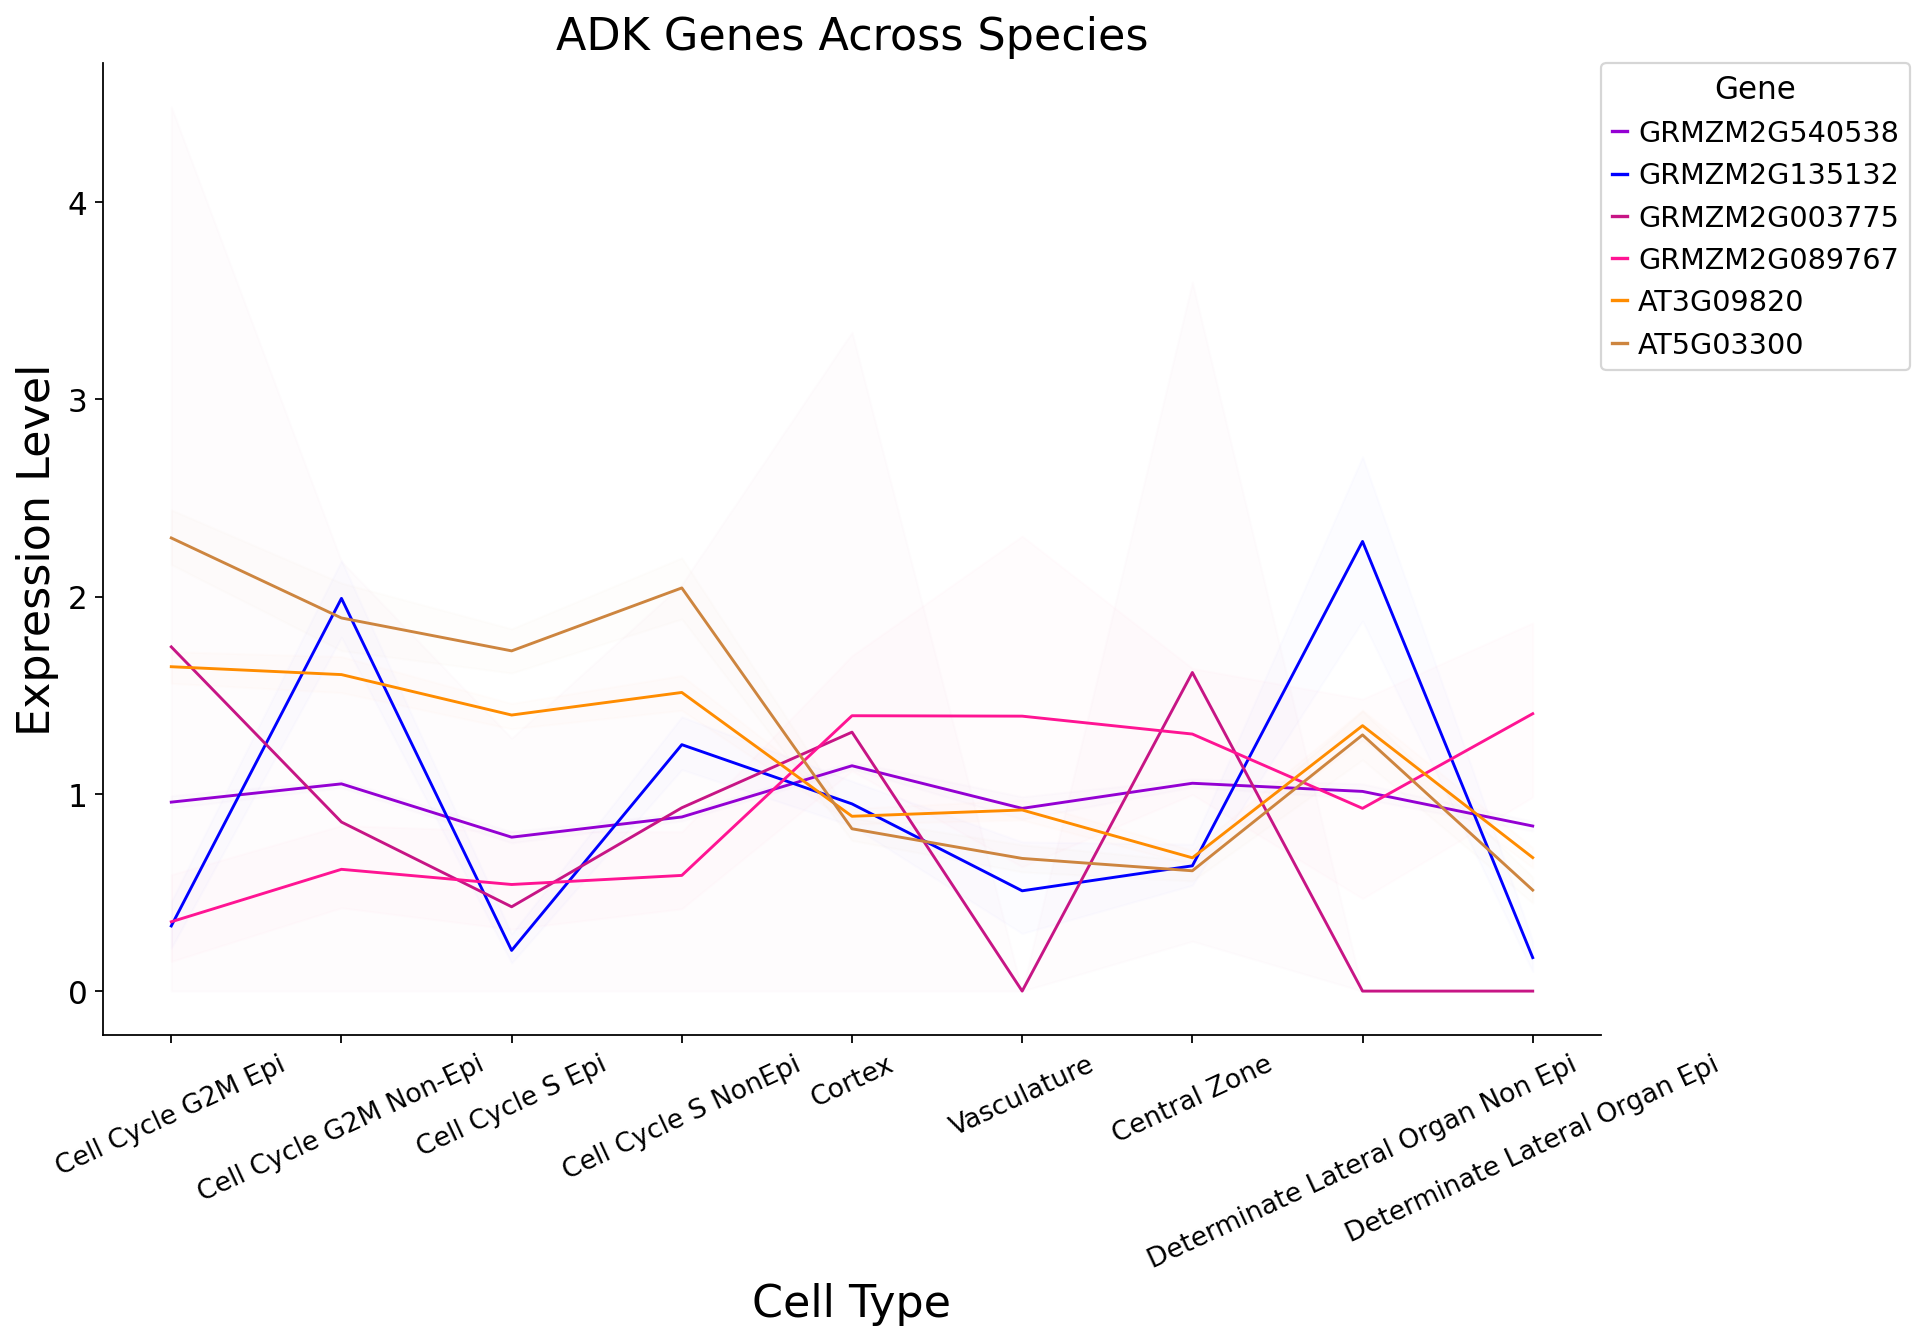

In [75]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.lineplot(data = one_centered_total_df, x = 'Cell Type Number',y = 'Expression Level',hue = 'Gene', hue_order=['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767','AT3G09820','AT5G03300'], palette= ['darkviolet','blue','mediumvioletred','deeppink','darkorange','peru'], err_kws= {'alpha':.01,}, linewidth = 1.3) #style = 'Gene', dashes = Truehue_order=['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767','AT3G09820','AT5G03300'], palette= ['darkviolet','darkviolet','darkviolet','darkviolet','darkorange','darkorange']
plt.ylabel("Expression Level", fontsize = 20)
plt.xlabel("Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.set_xticks([0,1,2,3,4,5,6,7,8], labels=list_of_cell_types)
#ax.set_xticklabels(['Phloem 1','Xylem','Endodermis 2','Phloem 2','Endodermis','Atrichoblasts/Columella','Trichoblasts','Meristematic/QC','Cortex'])
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
plt.title("ADK Genes Across Species", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title = 'Gene')

# replace legend using handles and labels from above

#plt.yticks(fontsize = 11)

In [76]:
#### PFKB gene Melter


total_gene_df = pd.DataFrame(columns = ['Gene','Expression Level','Cell Type'])

one_centered_total_df = pd.DataFrame(columns = ['Gene','Expression Level','Cell Type'])


full_genes_means = []
full_genes_stds = []
for cell_type in list_of_cell_types:
    print(cell_type)
    current_type_anndata = labeled_maize_single_cell[labeled_maize_single_cell.obs['Cell Type'] == cell_type,:]
    current_type_anndata = current_type_anndata[:,current_type_anndata.var_names.isin(list_of_PFKB_genes_in_maize)]


    panda_version_of_current_data = pd.DataFrame(columns = current_type_anndata.var_names, index = current_type_anndata.obs.index, data = current_type_anndata.X.todense())
    melted_genes = panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
    melted_genes['Cell Type'] = cell_type
    total_gene_df = pd.concat([total_gene_df,melted_genes])

    



    current_type_anndata = labeled_arabi_single_cell[labeled_arabi_single_cell.obs['Cell Type'] == cell_type,:]
    current_type_anndata = current_type_anndata[:,current_type_anndata.var_names.isin(arabidopsis_PFKB_genes)]

    panda_version_of_current_data = pd.DataFrame(columns = current_type_anndata.var_names, index = current_type_anndata.obs.index, data = current_type_anndata.X.todense())
    melted_genes = panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
    melted_genes['Cell Type'] = cell_type
    total_gene_df = pd.concat([total_gene_df,melted_genes])

Cell Cycle G2M Epi
Cell Cycle G2M Non-Epi
Cell Cycle S Epi
Cell Cycle S NonEpi
Cortex
Vasculature
Central Zone
Determinate Lateral Organ Non Epi
Determinate Lateral Organ Epi


In [77]:
total_gene_df['Cell Type Number'] = total_gene_df['Cell Type'].map(cell_type_number_mapper)

In [79]:
one_centered_total_df = total_gene_df.copy()

for gene in set(one_centered_total_df['Gene'].to_list()):
    all_gene_measurements = one_centered_total_df.loc[one_centered_total_df['Gene'] == gene]
    mean_centered_expression = all_gene_measurements['Expression Level']/all_gene_measurements['Expression Level'].mean()
    one_centered_total_df['Expression Level'].loc[one_centered_total_df['Gene'] == gene] = mean_centered_expression
one_centered_total_df = one_centered_total_df.reset_index()

/tmp/ipykernel_429716/2595593236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_centered_total_df['Expression Level'].loc[one_centered_total_df['Gene'] == gene] = mean_centered_expression


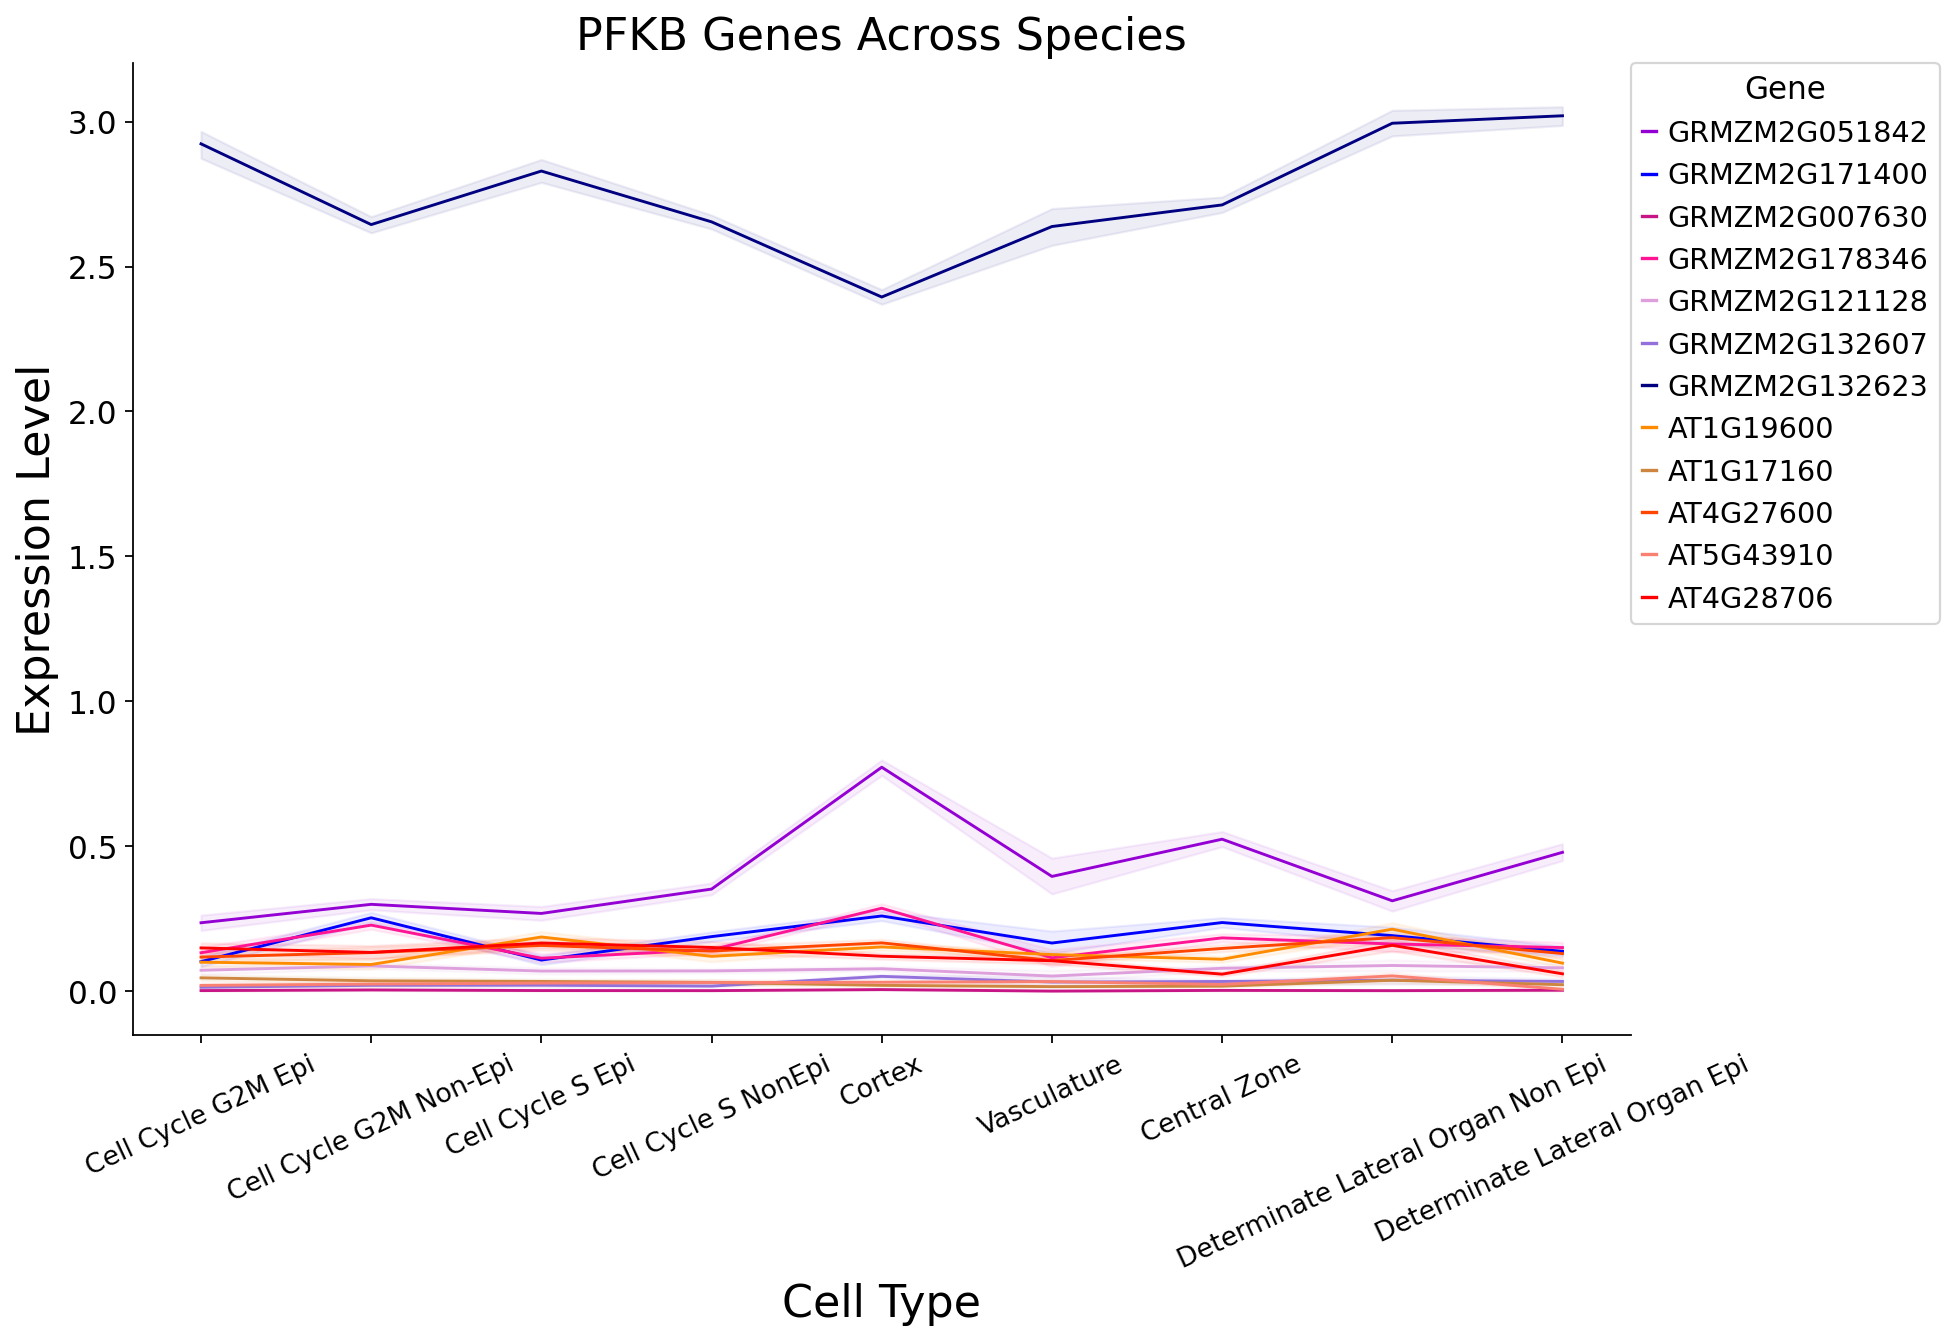

In [80]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.lineplot(data = total_gene_df, x = 'Cell Type Number',y = 'Expression Level',hue = 'Gene', hue_order=['GRMZM2G051842','GRMZM2G171400','GRMZM2G007630','GRMZM2G178346','GRMZM2G121128','GRMZM2G132607','GRMZM2G132623','AT1G19600','AT1G17160','AT4G27600','AT5G43910','AT4G28706'], palette= ['darkviolet','blue','mediumvioletred','deeppink','plum','mediumpurple','navy','darkorange','peru','orangered','salmon','red'], err_kws= {'alpha':.07,}, linewidth = 1.3) #style = 'Gene', dashes = Truehue_order=['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767','AT3G09820','AT5G03300'], palette= ['darkviolet','darkviolet','darkviolet','darkviolet','darkorange','darkorange']
plt.ylabel("Expression Level", fontsize = 20)
plt.xlabel("Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.set_xticks([0,1,2,3,4,5,6,7,8], labels=list_of_cell_types)
#ax.set_xticklabels(['Phloem 1','Xylem','Endodermis 2','Phloem 2','Endodermis','Atrichoblasts/Columella','Trichoblasts','Meristematic/QC','Cortex'])
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
plt.title("PFKB Genes Across Species", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title = 'Gene')

# replace legend using handles and labels from above

#plt.yticks(fontsize = 11)

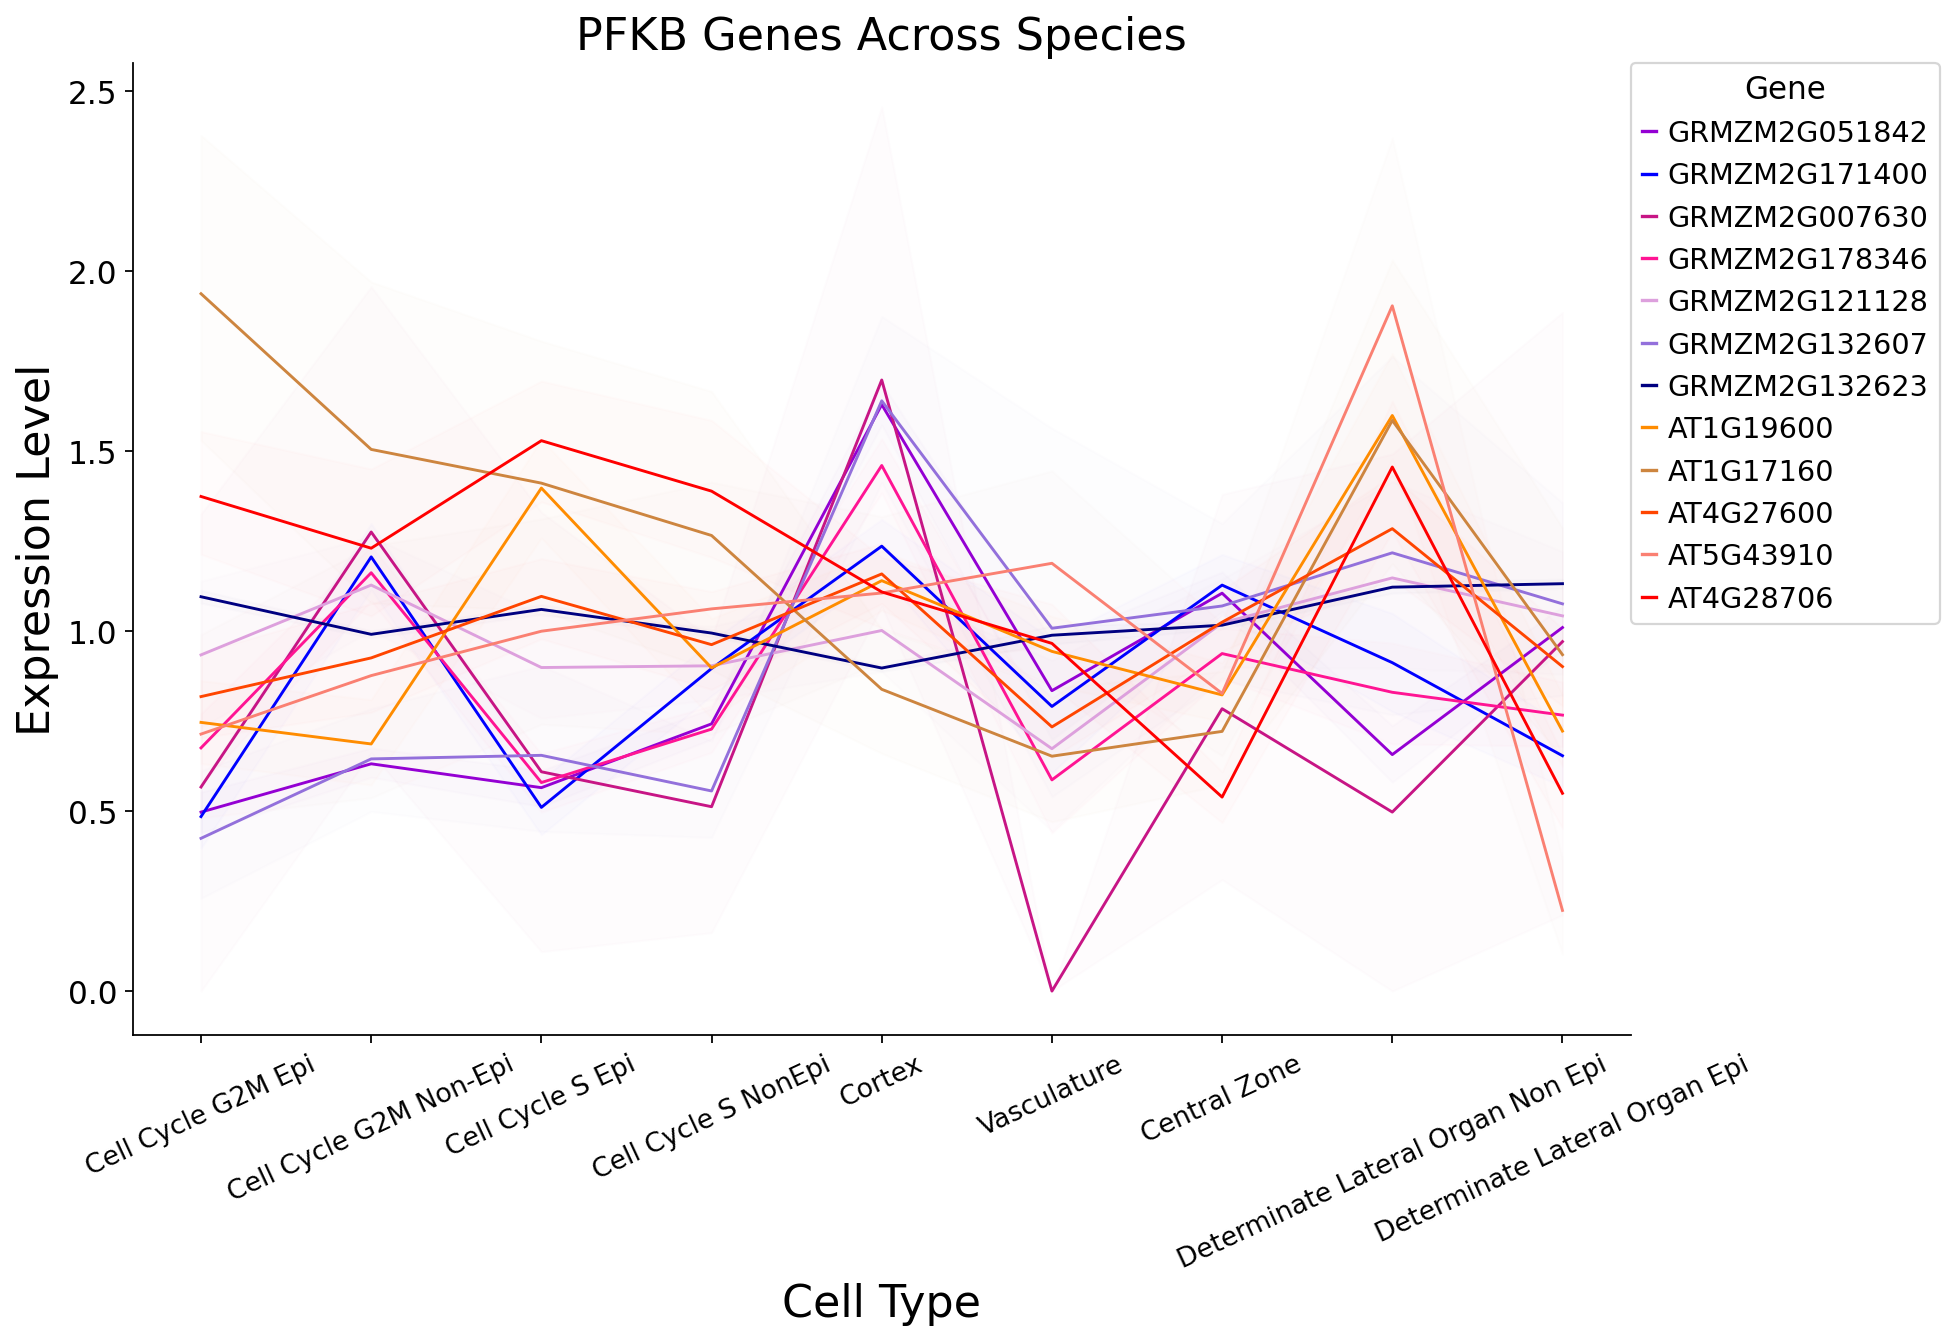

In [82]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.lineplot(data = one_centered_total_df, x = 'Cell Type Number',y = 'Expression Level',hue = 'Gene', hue_order=['GRMZM2G051842','GRMZM2G171400','GRMZM2G007630','GRMZM2G178346','GRMZM2G121128','GRMZM2G132607','GRMZM2G132623','AT1G19600','AT1G17160','AT4G27600','AT5G43910','AT4G28706'], palette= ['darkviolet','blue','mediumvioletred','deeppink','plum','mediumpurple','navy','darkorange','peru','orangered','salmon','red'], err_kws= {'alpha':.01,}, linewidth = 1.3) #style = 'Gene', dashes = Truehue_order=['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767','AT3G09820','AT5G03300'], palette= ['darkviolet','darkviolet','darkviolet','darkviolet','darkorange','darkorange']
plt.ylabel("Expression Level", fontsize = 20)
plt.xlabel("Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.set_xticks([0,1,2,3,4,5,6,7,8], labels=list_of_cell_types)
#ax.set_xticklabels(['Phloem 1','Xylem','Endodermis 2','Phloem 2','Endodermis','Atrichoblasts/Columella','Trichoblasts','Meristematic/QC','Cortex'])
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
plt.title("PFKB Genes Across Species", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title = 'Gene')

# replace legend using handles and labels from above

#plt.yticks(fontsize = 11)

In [83]:
list_of_cell_types

['Cell Cycle G2M Epi',
 'Cell Cycle G2M Non-Epi',
 'Cell Cycle S Epi',
 'Cell Cycle S NonEpi',
 'Cortex',
 'Vasculature',
 'Central Zone',
 'Determinate Lateral Organ Non Epi',
 'Determinate Lateral Organ Epi']

In [84]:
cut_bad_maize_cells = ['Cell Cycle G2M Epi',
 'Cell Cycle G2M Non-Epi',
 'Cell Cycle S Epi',
 'Cell Cycle S NonEpi',
 'Determinate Lateral Organ Non Epi',
 'Determinate Lateral Organ Epi']

In [111]:
cell_type_number_mapper_cut_bad = {'Cell Cycle G2M Epi':0,
    'Cell Cycle G2M Non-Epi':1,
    'Cell Cycle S Epi':2,
    'Cell Cycle S NonEpi':3,
    'Determinate Lateral Organ Non Epi':4,
    'Determinate Lateral Organ Epi':5}

In [87]:
arabi_psuedobulked_means_cut_bad = arabi_psuedobulked_means.drop(index = ['Cortex','Vasculature','Central Zone'])
maize_psuedobulked_means_cut_bad = maize_psuedobulked_means.drop(index = ['Cortex','Vasculature','Central Zone'])

In [91]:
all_means_concat_cut_bad = pd.concat([maize_psuedobulked_means_cut_bad,arabi_psuedobulked_means_cut_bad], axis = 1)


In [92]:
full_correlations_cut_bad = all_means_concat_cut_bad.corr(method ='pearson')

In [117]:
adk_correlations = full_correlations_cut_bad.filter(list_of_ADK_genes_in_maize).filter(arabidopsis_adk_genes,axis = 0)
adk_correlations

_index     GRMZM2G540538  GRMZM2G135132  GRMZM2G003775  GRMZM2G089767
_index                                                               
AT3G09820       0.466777       0.361887       0.717710      -0.940963
AT5G03300       0.277813       0.114309       0.854228      -0.978967

In [93]:
maize_vs_arabi_correlations_cut_bad = full_correlations_cut_bad.filter(labeled_arabi_single_cell.var.index).drop(labeled_arabi_single_cell.var.index)

In [94]:
each_maize_gene_is_x_percentile_with_col_gene_cut_bad = maize_vs_arabi_correlations_cut_bad.rank(pct = True)
each_arabi_gene_is_x_percentile_with_row_gene_cut_bad = maize_vs_arabi_correlations_cut_bad.rank(pct = True, axis = 1)

In [103]:
arabi_pfkb_percentile = each_maize_gene_is_x_percentile_with_col_gene_cut_bad.filter(arabidopsis_PFKB_genes).filter(list_of_PFKB_genes_in_maize,axis = 0)
arabi_pfkb_percentile

_index         AT1G19600  AT1G17160  AT4G27600  AT5G43910  AT4G28706
_index                                                              
GRMZM2G051842   0.352451   0.003356   0.464095   0.191384   0.037694
GRMZM2G171400   0.488843   0.436101   0.663593   0.787445   0.629772
GRMZM2G007630   0.091764   0.262015   0.215616   0.154428   0.252757
GRMZM2G178346   0.292922   0.533028   0.492716   0.608749   0.507985
GRMZM2G121128   0.659093   0.506694   0.777044   0.781323   0.460333
GRMZM2G132607   0.880980   0.168960   0.905543   0.774757   0.366577
GRMZM2G132623   0.793273   0.506067   0.695902   0.523181   0.389075

In [104]:
arabi_adk_percentile = each_maize_gene_is_x_percentile_with_col_gene_cut_bad.filter(arabidopsis_adk_genes).filter(list_of_ADK_genes_in_maize,axis = 0)
arabi_adk_percentile

_index         AT3G09820  AT5G03300
_index                             
GRMZM2G540538   0.838675   0.735736
GRMZM2G135132   0.767824   0.656917
GRMZM2G003775   0.947737   0.984104
GRMZM2G089767   0.019031   0.000996

In [105]:
maize_pfkb_percentile = each_arabi_gene_is_x_percentile_with_row_gene_cut_bad.filter(arabidopsis_PFKB_genes).filter(list_of_PFKB_genes_in_maize,axis = 0)
maize_pfkb_percentile

_index         AT1G19600  AT1G17160  AT4G27600  AT5G43910  AT4G28706
_index                                                              
GRMZM2G051842   0.648162   0.059465   0.743788   0.542588   0.097034
GRMZM2G171400   0.401172   0.411257   0.720574   0.859719   0.535229
GRMZM2G007630   0.052742   0.279562   0.197928   0.106119   0.070140
GRMZM2G178346   0.221596   0.554718   0.475492   0.621042   0.369009
GRMZM2G121128   0.735474   0.628765   0.888021   0.868896   0.405533
GRMZM2G132607   0.849407   0.458820   0.922955   0.780539   0.481806
GRMZM2G132623   0.758552   0.604370   0.720438   0.604824   0.425567

In [106]:
maize_adk_percentile = each_arabi_gene_is_x_percentile_with_row_gene_cut_bad.filter(arabidopsis_adk_genes).filter(list_of_ADK_genes_in_maize,axis = 0)
maize_adk_percentile

_index         AT3G09820  AT5G03300
_index                             
GRMZM2G540538   0.854722   0.654204
GRMZM2G135132   0.784355   0.568937
GRMZM2G003775   0.783900   0.939899
GRMZM2G089767   0.060464   0.008722

In [107]:
averages = (maize_pfkb_percentile.stack()+arabi_pfkb_percentile.stack())/2
averages = averages.unstack()
averages

_index         AT1G19600  AT1G17160  AT4G27600  AT5G43910  AT4G28706
_index                                                              
GRMZM2G051842   0.500307   0.031411   0.603941   0.366986   0.067364
GRMZM2G171400   0.445008   0.423679   0.692084   0.823582   0.582500
GRMZM2G007630   0.072253   0.270788   0.206772   0.130273   0.161449
GRMZM2G178346   0.257259   0.543873   0.484104   0.614895   0.438497
GRMZM2G121128   0.697284   0.567730   0.832532   0.825109   0.432933
GRMZM2G132607   0.865193   0.313890   0.914249   0.777648   0.424192
GRMZM2G132623   0.775912   0.555219   0.708170   0.564003   0.407321

In [108]:
averages.T

_index     GRMZM2G051842  GRMZM2G171400  GRMZM2G007630  GRMZM2G178346  \
_index                                                                  
AT1G19600       0.500307       0.445008       0.072253       0.257259   
AT1G17160       0.031411       0.423679       0.270788       0.543873   
AT4G27600       0.603941       0.692084       0.206772       0.484104   
AT5G43910       0.366986       0.823582       0.130273       0.614895   
AT4G28706       0.067364       0.582500       0.161449       0.438497   

_index     GRMZM2G121128  GRMZM2G132607  GRMZM2G132623  
_index                                                  
AT1G19600       0.697284       0.865193       0.775912  
AT1G17160       0.567730       0.313890       0.555219  
AT4G27600       0.832532       0.914249       0.708170  
AT5G43910       0.825109       0.777648       0.564003  
AT4G28706       0.432933       0.424192       0.407321

In [109]:
averages = (maize_adk_percentile.stack()+arabi_adk_percentile.stack())/2
averages = averages.unstack()
averages

_index         AT3G09820  AT5G03300
_index                             
GRMZM2G540538   0.846699   0.694970
GRMZM2G135132   0.776089   0.612927
GRMZM2G003775   0.865819   0.962001
GRMZM2G089767   0.039748   0.004859

In [110]:
averages.T

_index     GRMZM2G540538  GRMZM2G135132  GRMZM2G003775  GRMZM2G089767
_index                                                               
AT3G09820       0.846699       0.776089       0.865819       0.039748
AT5G03300       0.694970       0.612927       0.962001       0.004859

In [112]:
cut_bad_maize_cells

['Cell Cycle G2M Epi',
 'Cell Cycle G2M Non-Epi',
 'Cell Cycle S Epi',
 'Cell Cycle S NonEpi',
 'Determinate Lateral Organ Non Epi',
 'Determinate Lateral Organ Epi']

In [113]:


total_gene_df = pd.DataFrame(columns = ['Gene','Expression Level','Cell Type'])

full_genes_means = []
full_genes_stds = []
for cell_type in cut_bad_maize_cells:
    print(cell_type)
    current_type_anndata = labeled_maize_single_cell[labeled_maize_single_cell.obs['Cell Type'] == cell_type,:]
    current_type_anndata = current_type_anndata[:,current_type_anndata.var_names.isin(list_of_ADK_genes_in_maize)]


    panda_version_of_current_data = pd.DataFrame(columns = current_type_anndata.var_names, index = current_type_anndata.obs.index, data = current_type_anndata.X.todense())
    
    melted_genes = panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
    melted_genes['Cell Type'] = cell_type
    total_gene_df = pd.concat([total_gene_df,melted_genes])





    current_type_anndata = labeled_arabi_single_cell[labeled_arabi_single_cell.obs['Cell Type'] == cell_type,:]
    current_type_anndata = current_type_anndata[:,current_type_anndata.var_names.isin(arabidopsis_adk_genes)]

    panda_version_of_current_data = pd.DataFrame(columns = current_type_anndata.var_names, index = current_type_anndata.obs.index, data = current_type_anndata.X.todense())
    melted_genes = panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
    melted_genes['Cell Type'] = cell_type
    total_gene_df = pd.concat([total_gene_df,melted_genes])

Cell Cycle G2M Epi
Cell Cycle G2M Non-Epi
Cell Cycle S Epi
Cell Cycle S NonEpi
Determinate Lateral Organ Non Epi
Determinate Lateral Organ Epi


In [114]:
total_gene_df['Cell Type Number'] = total_gene_df['Cell Type'].map(cell_type_number_mapper_cut_bad)

In [115]:
cut_bad_maize_cells

['Cell Cycle G2M Epi',
 'Cell Cycle G2M Non-Epi',
 'Cell Cycle S Epi',
 'Cell Cycle S NonEpi',
 'Determinate Lateral Organ Non Epi',
 'Determinate Lateral Organ Epi']

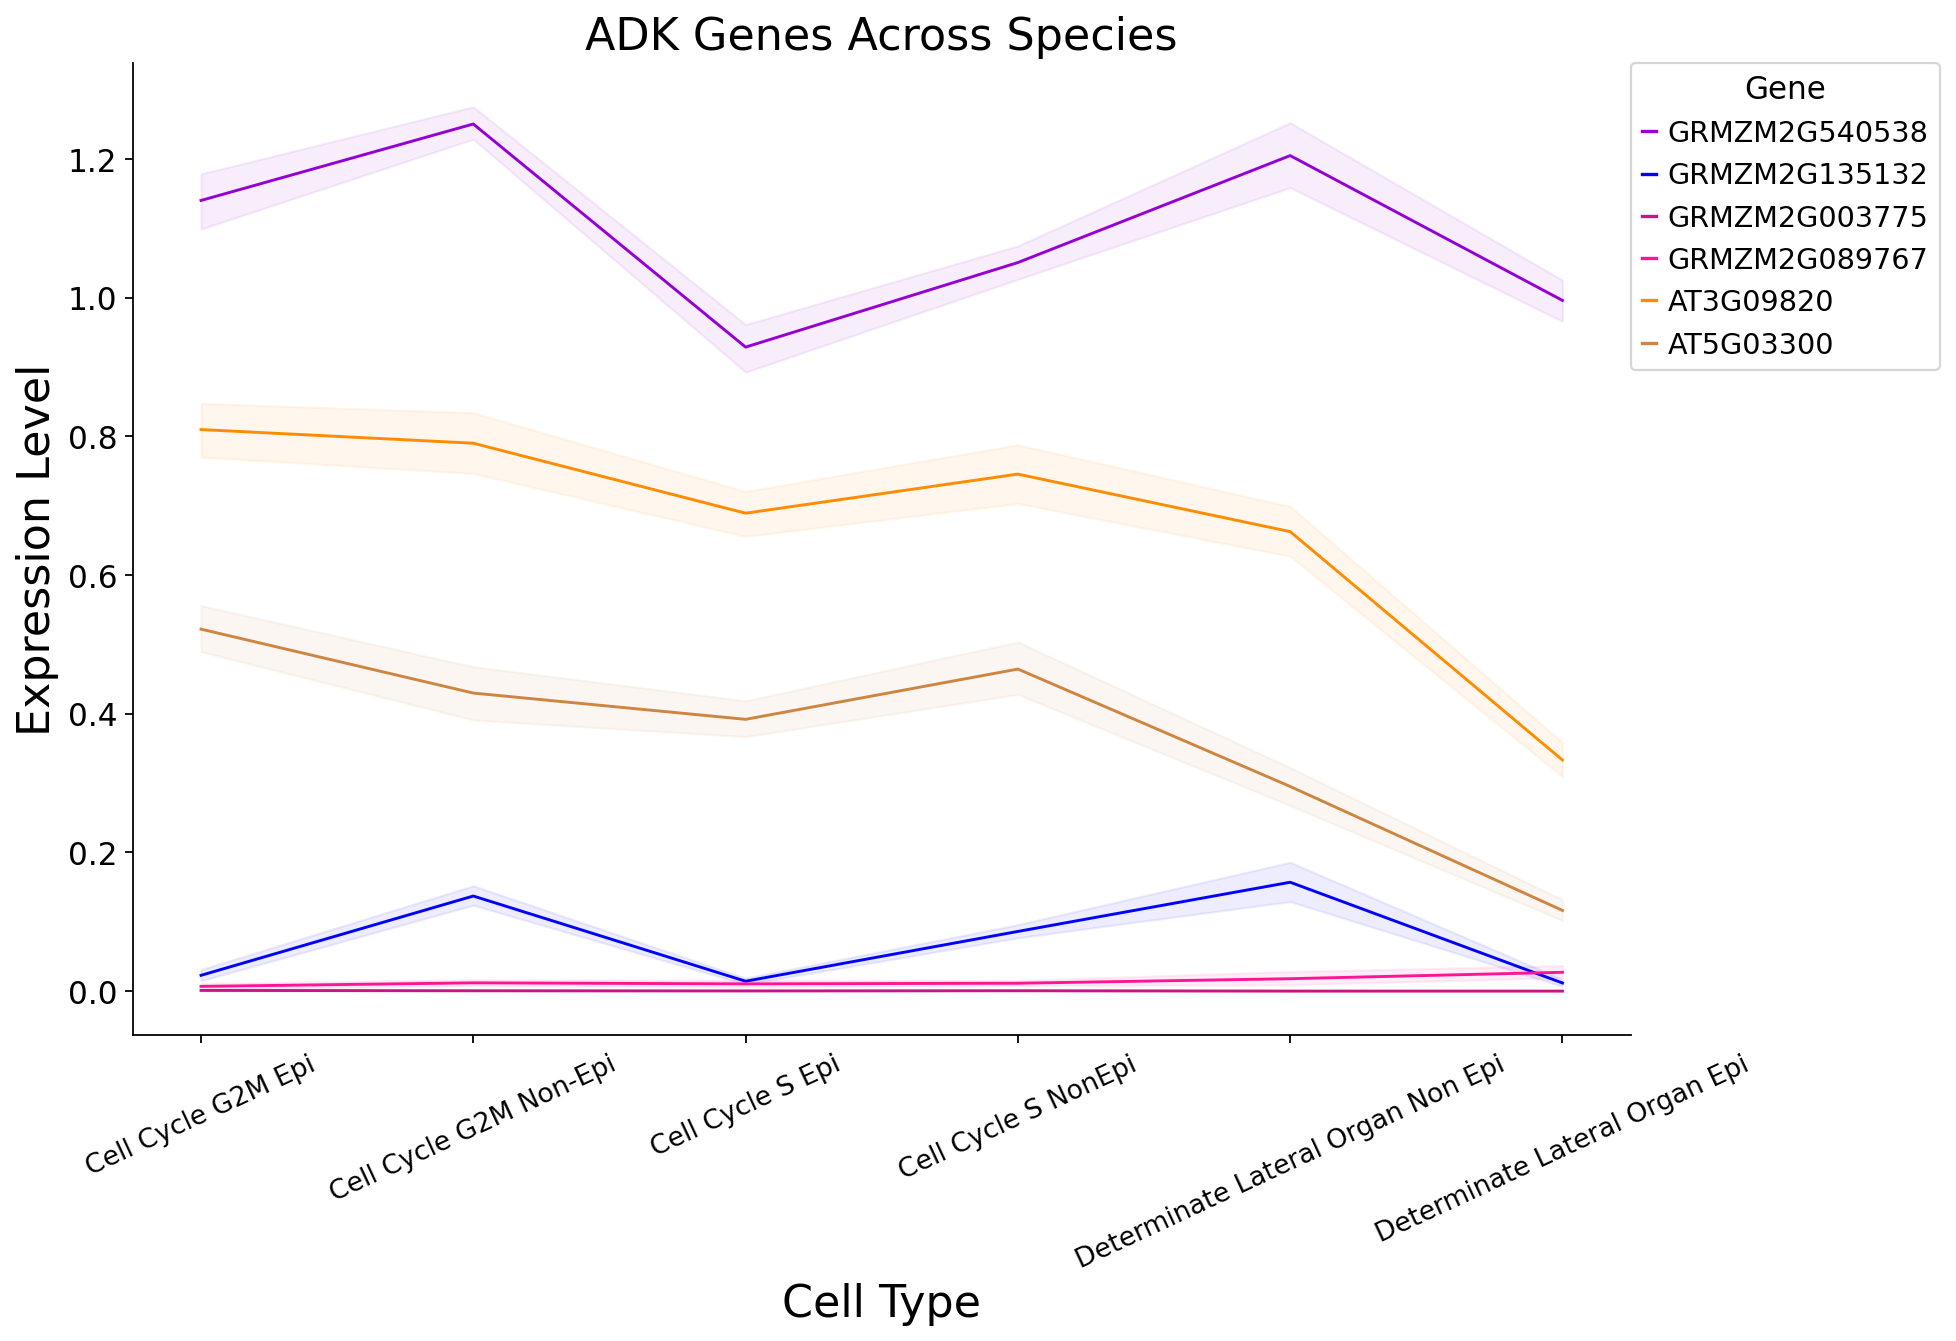

In [116]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.lineplot(data = total_gene_df, x = 'Cell Type Number',y = 'Expression Level',hue = 'Gene', hue_order=['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767','AT3G09820','AT5G03300'], palette= ['darkviolet','blue','mediumvioletred','deeppink','darkorange','peru'], err_kws= {'alpha':.07,}, linewidth = 1.3) #style = 'Gene', dashes = Truehue_order=['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767','AT3G09820','AT5G03300'], palette= ['darkviolet','darkviolet','darkviolet','darkviolet','darkorange','darkorange']
plt.ylabel("Expression Level", fontsize = 20)
plt.xlabel("Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.set_xticks([0,1,2,3,4,5], labels=cut_bad_maize_cells)
#ax.set_xticklabels(['Phloem 1','Xylem','Endodermis 2','Phloem 2','Endodermis','Atrichoblasts/Columella','Trichoblasts','Meristematic/QC','Cortex'])
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
plt.title("ADK Genes Across Species", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title = 'Gene')

# replace legend using handles and labels from above

#plt.yticks(fontsize = 11)

In [ ]:
maize_correlations  = maize_psuedobulked_means.corr(method= 'pearson')

In [ ]:
pd.DataFrame(data = labeled_maize_single_cell.X.todense()).melt().sample(n = 10000)

In [ ]:
ax = sns.histplot(data = maize_correlations.melt().sample(n = 10000), x = 'value')

In [ ]:
ax = sns.histplot(data = maize_correlations.melt().sample(n = 10000), x = 'value')